**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 8 - Vlastné čísla a vlastné vektory matíc </font>** 

<a id=table_of_contents></a>
##  Obsah

* [Úvod](#uvod) 


* [Existencia a jednoznačnosť](#existencia) 


* [Násobnosť a diagonalizovateľnosť](#nasobnost) 


* [Lokalizácia vlastných čísel](#lokalizacia) 


* [Podmienenosť](#podmienenost)


* [Transformácie](#transformacie)


* [Špeciálne matice](#specialne)


* [Metódy výpočtu](#metody)


* [Výpočet singulárnych čísel a vektorov](#singularne)


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.**

In [1]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod </font> 

Výpočet *vlastných čísel (hodnôt)* a *vlastných vektorov* matice je vo svojej podstate iteratívny výpočtový problém. Totiž Niels Abel dokázal, že kvintické rovnice (algebraické rovnice piateho stupňa) nemožno vo všeobecnosti riešiť konečnými algebraickými vzorcami. Keďže problém vlastných hodnôt možno formulovať ako riešenie algebraickej rovnice, t.j. $\det(\mathbf{A} −\lambda\mathbf{I}) = 0$, tak z Abelovho výsledku vyplýva, že výpočet vlastných hodnôt matice $n\times n$, $n > 4$, vyžaduje iteračné numerické metódy.

Ako ďalej uvidíme, pre reálnu maticu sú vo všeobecnosti vlastné čísla i vlastné vektory z oboru komplexných čísel, preto Definícia 1 vyzerá nasledovne: 

---

### <font color=red> Definícia 1 </font> 

Nech $\mathbf{A}\in\mathbb{C}^{n\times n}$, $\mathbf{x}\in\mathbb{C}^n$ a $\lambda\in\mathbb{C}$. Hovoríme, že $\mathbf{x}$ je **_pravý vlastný vektor_** prislúchajúci k **_vlastnému číslu $\lambda$_**, ak $\mathbf{x}\neq\mathbf{0}$ a $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$. Podobne vektor $\mathbf{y}$ sa nazýva **_ľavý vlastný vektor_** prislúchajúci k **_vlastnému číslu $\lambda$_**, ak $\mathbf{y}\neq\mathbf{0}$ a $\mathbf{y}^{H}\mathbf{A}=\mathbf{y}^{H}\lambda$.

---

--- 

#### Poznámka 1 

* Označenie $\mathbf{y}^{H}$ reprezentuje [konjugovanú transpozíciu resp. hermitovsku transpozíciu](https://en.wikipedia.org/wiki/Conjugate_transpose).   


* Vo väčšine aplikácií sa vyskytujú reálne matice, preto sa zameriame predovšetkým na nich, no niektoré pojmy či vlastnosti budú uvažované resp. formulované vo všeobecnejšom zmysle, t.j. v komplexnom obore.   


* Keďže nad poľom reálnych čísel platí $\mathbf{A}'\mathbf{y}=\lambda\mathbf{y}$, tak ľavý vlastný vektor $\mathbf{y}$ matice $\mathbf{A}$ je v podstate pravý vlastný vektor matice $\mathbf{A}'$, preto sa obmedzíme na problém hľadania pravých vlastných vektorov, t.j. 

\begin{align*}\label{eq:Eigen1} \tag{1}
\mathbf{A}\mathbf{x}=\lambda\mathbf{x}. 
\end{align*}


* Množina všetkých vlastných čísel matice $\mathbf{A}$ sa nazýva **_spektrum matice_** $\mathbf{A}$ a označuje sa $\lambda(\mathbf{A})$. 

---

---

#### <font color=blue> Príklad 1 </font> 

Majme transformáciu $T(\mathbf{x})$, ktorá zobrazuje body (resp. vektory) dvojrozmerného priestoru (roviny) opäť do dvojrozmerného priestoru, t.j. $T:\mathbb{R}^{2}\rightarrow\mathbb{R}^{2}$ definované vzťahom $T(\mathbf{x})=\mathbf{A}\mathbf{x}$, kde $\mathbf{A}=
\begin{pmatrix}
1 & 3 \\
0 & 1
\end{pmatrix}.$ 

O tejto transformácii je možné ukázať (overte!), že ide o tzv. "skosenie" (naklonenie) a pekne to vystihuje nasledujúci obrázok, čo sa vlastne deje pri zobrazovaní. Predstavme si obrázok ovce ako súbor bodov či vektorov, ktoré keď všetky zobrazíme pomocou uvažovanej transformácie $T$, tak dostaneme nový obrázok ovce taký, ako to ukazuje nasledujúca ilustrácia. 

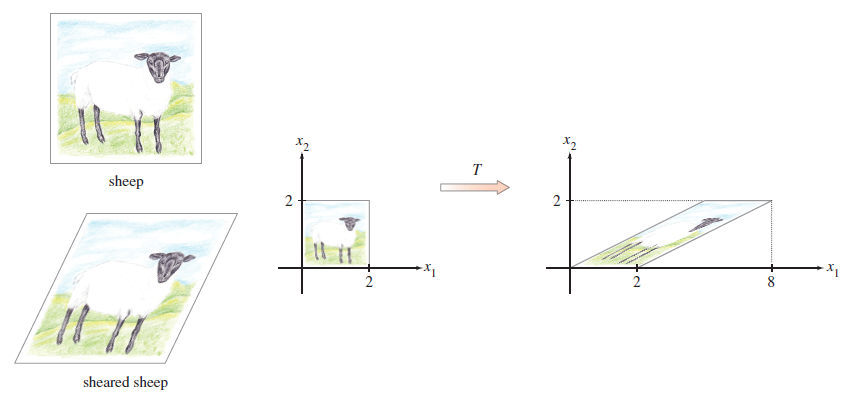
$$\text{Zdroj: Lay (2016).}$$

---

---

#### <font color=blue> Príklad 2 </font> 

Uvažujme maticu $\mathbf{A}=
\begin{pmatrix}
\frac{3}{2} & \frac{3}{4} \\ 
0 & 1 
\end{pmatrix}$. 
Táto matica (ako uvidíme) predstavuje skosenie a pretiahnutie (predĺženie) v smere osi $x_1$ (resp. $x$) o $50\%$ a v smere osi $x_2$ (resp. $y$) nijako nepredĺžuje. Mohli by sme si predstaviť podobný obrázok ako v Príklade 1. Nájdime teraz vlastné čísla uvedenej matice $\mathbf{A}$. Potrebujeme nájsť $\lambda$ také, aby platilo 

$$\mathbf{A}\mathbf{x}=\lambda\mathbf{x},$$ 

pričom $\mathbf{x}=(x_1,x_2)^T$. Urobme najprv nasledovnú úpravu predchádzajúceh vzťahu: 

$$\mathbf{A}\mathbf{x}-\lambda\mathbf{x}=\mathbf{0},$$ 

ďalej 

$$\left(\mathbf{A}-\lambda\mathbf{I}\right)\mathbf{x}=\mathbf{0},$$ 

kde $\mathbf{I}$ je diagonálna jednotková matica rozmerov $2\times2$. 

V podstate máme vyriešiť homogénnu (s nulovou pravou stranou) sústavu lineárnych rovníc (hľadáme netriviálne tzn. nenulové riešenie), kde neznáme sú zložky vektora $\mathbf{x}$ t.j. $x_1,x_2$. Z teórie sústav lineárnych rovníc vieme, že homogénna sústava má netriviálne (nenulové) riešenie práve vtedy, keď je determinant tejto sústavy rovný nule (t.j. stĺpce matice sú lineárne závislé vektory). Preto riešime nasledovné  

$$\left|\mathbf{A}-\lambda\mathbf{I}\right|=0$$ 

a hľadáme také $\lambda$, pre ktoré je ľavá strana rovná nule. Dosadíme čísla zo zadaného príkladu a dostávame 

$$\left|\begin{pmatrix}
\frac{3}{2} & \frac{3}{4} \\ 
0 & 1 
\end{pmatrix}-\lambda\begin{pmatrix}
1 & 0 \\ 
0 & 1 
\end{pmatrix}\right|=0$$ 

$$\left|\begin{pmatrix}
\frac{3}{2} & \frac{3}{4} \\ 
0 & 1 
\end{pmatrix}-\begin{pmatrix}
\lambda & 0 \\ 
0 & \lambda 
\end{pmatrix}\right|=0$$ 

$$\left|\begin{pmatrix}
\frac{3}{2} - \lambda & \frac{3}{4} \\ 
0 & 1-\lambda 
\end{pmatrix}\right|=0.$$ 

Determinant ľahko určíme pomcou Sarrusovho pravidla pre výpočet determinantov $2\times2$ takto 

$$\left(\frac{3}{2}-\lambda\right)\left(1-\lambda\right)=0.$$ 

Odtiaľ je vidieť, že  výraz naľavo je rovný nule pre $\lambda_1=\frac{3}{2}$ a $\lambda_2=1$. Teraz ešte potrebujeme nájsť vlastné vektory odpovedajúce vlastným číslam. <br/> 
Vezmime najprv $\lambda_1=\frac{3}{2}$, dosaďme do vzťahu (uvedeného vyššie) 

$$\left(\mathbf{A}-\lambda\mathbf{I}\right)\mathbf{x}=\mathbf{0}$$ 

$$\begin{pmatrix}
\frac{3}{2} - \lambda_1 & \frac{3}{4} \\ 
0 & 1-\lambda_1 
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}=\mathbf{0}$$ 

$$\begin{pmatrix}
\frac{3}{2} - \frac{3}{2} & \frac{3}{4} \\ 
0 & 1-\frac{3}{2} 
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}=\mathbf{0}$$ 

$$\begin{pmatrix}
0 & \frac{3}{4} \\ 
0 & -\frac{1}{2} 
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}=\mathbf{0}.$$ 

Riešime homogénnu sústavu lineárnych rovníc s neznámymi $x_1,x_2$, tu môžeme aplikovať napr. Gaussovu eliminačnú metódu (v maticovom tvare) alebo využiť Sage. Vynulovaním prvku $-\frac{1}{2}$ a následným vynechaním nulového riadka dostaneme finálny tvar 

$$\begin{pmatrix}
0 & \frac{3}{4} 
\end{pmatrix}$$

odkiaľ voľbou $x_2=0$, $x_1=1$ dostávame vlastný vektor $\mathbf{x}=(1,0)^T$ prislúchajúci vlastnému číslu $\lambda_1=\frac{3}{2}$. Vektor $(1,0)^T$ je vlastne smer osi $x$ a spolu s vlastným číslom $\lambda_1=\frac{3}{2}$ nám to hovorí, že obrázok sa v zobrazení danom maticou $\mathbf{A}$ natiahne (predĺži) v smere osi $x$  $50\%$ (tzn. nový obrázok je 1.5-násobok pôvodného obrázka). <br/> 
Analogicky určíme aj vlastný vektor prislúchajúci vlastnému číslu $\lambda_2=1$. 

$$\left(\mathbf{A}-\lambda\mathbf{I}\right)\mathbf{x}=\mathbf{0}$$ 

$$\begin{pmatrix}
\frac{3}{2} - \lambda_2 & \frac{3}{4} \\ 
0 & 1-\lambda_2
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}=\mathbf{0}$$ 

$$\begin{pmatrix}
\frac{1}{2} - 1 & \frac{3}{4} \\ 
0 & 1-1 
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}=\mathbf{0}$$ 

$$\begin{pmatrix}
\frac{3}{2} & \frac{3}{4} \\ 
0 & 0 
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}=\mathbf{0}.$$ 

Odtiaľ máme 

$$\begin{pmatrix}
\frac{1}{2} & \frac{3}{4}
\end{pmatrix}$$ 

a voľbou napr. $x_2=1$, následným dopočítaním $x_1=-\frac{3}{2}$ dostávame vlastný vektor $\mathbf{x}=\left(-\frac{3}{2},1\right)^T$ prislúchajúci vlastnému číslu $\lambda_2=1$. Vektor $\left(-\frac{3}{2},1\right)^T$ spolu s vlastným číslom $\lambda_2=1$ nám hovoria, že obrázok sa v zobrazení danom maticou $\mathbf{A}$ v smere vektora $\left(-\frac{3}{2},1\right)^T$ nedeformuje (ak by bolo $|\lambda_2|<1$, tak by došlo ku skráteniu resp. zúženiu obrázka). 

In [4]:
from numpy.linalg import eig 

A = np.array([[3/2, 3/4], 
              [0, 1]])
print('A = ') 
print(A) 
print('')
eigval, eigvec = eig(A)
print('vlastne cisla:')
print(eigval)
print('')
print('vlastne vektory:') 
print(eigvec)

A = 
[[1.5  0.75]
 [0.   1.  ]]

vlastne cisla:
[1.5 1. ]

vlastne vektory:
[[ 1.         -0.83205029]
 [ 0.          0.5547002 ]]


In [3]:
from scipy import linalg 

A = np.array([[3/2, 3/4], 
              [0, 1]])
print('A = ') 
print(A) 
print('')
eigval, eigvec = linalg.eig(A)
print('vlastne cisla:')
print(eigval)
print('')
print('vlastne vektory:') 
print(eigvec)
print('')
print('prvy vlastny vektor:') 
print(eigvec[:,0])
print('') 
print('druhy vlastny vektor:') 
print(eigvec[:,1])

A = 
[[1.5  0.75]
 [0.   1.  ]]

vlastne cisla:
[1.5+0.j 1. +0.j]

vlastne vektory:
[[ 1.         -0.83205029]
 [ 0.          0.5547002 ]]

prvy vlastny vektor:
[1. 0.]

druhy vlastny vektor:
[-0.83205029  0.5547002 ]


--- 

***
<a id=existencia></a>
 # <font color=brown> Existencia a jednoznačnosť </font> 

Rovnicu $(1)$ je možné ekvivalentne zapísať v tvare 

\begin{align*}\label{eq:Eigen2} \tag{2}
(\mathbf{A}-\lambda\mathbf{I})\mathbf{x}=\mathbf{0}. 
\end{align*}

To je homogénna SLR, ktorá má nenulové riešenie práve vtedy, keď je matica sústavy singulárna (napr. má lineárne závislé stĺpce). Vlastné čísla matice $\mathbf{A}$ (typu $n\times n$) musia teda spĺňať **_charakteristickú rovnicu_** 

\begin{align*}\label{eq:Eigen3} \tag{3}
\det(\mathbf{A}-\lambda\mathbf{I})=0. 
\end{align*}

Odtiaľ dostaneme tzv. **_charakteristický polynóm_** $p(\lambda)=\det(\mathbf{A}-\lambda\mathbf{I})$ matice $\mathbf{A}$, premennej $\lambda$, stupňa $n$. Vlastné čísla matice $\mathbf{A}$ sú teda korene charakteristického polynómu. Zo základnej vety algebry vyplýva, že polynóm 

$$p(\lambda)=c_n\lambda^n+c_{n-1}\lambda^{n-1}+\ldots+c_1\lambda+c_0=c_n(\lambda-\lambda_1)(\lambda-\lambda_2)\ldots(\lambda-\lambda_n),\quad c_n=(-1)^n,$$ 

má presne $n$ koreňov. Matica $\mathbf{A}$ rádu $n$ má teda $n$ vlastných čísel, ktoré ale nemusia byť reálne, ani navzájom rôzne. Komplexné vlastné čísla sa vyskytujú vždy v komplexne združených pároch: tzn. ak $\lambda=\alpha+i\beta$, kde $i^2=-1$ a $\beta\neq0$ je vlastné číslo, tak potom aj $\bar{\lambda}=\alpha-i\beta$ je vlastné číslo. 

Vlastné vektory sa získajú riešením SLR \eqref{eq:Eigen2}. Tieto sústavy majú pre každé $\lambda$ nekonečne veľa riešení $x\in N(\mathbf{A}-\lambda\mathbf{I})$, kde $N(\mathbf{A}-\lambda\mathbf{I})$ je *[jadro matice](https://cs.wikipedia.org/wiki/J%C3%A1dro_matice)* $\mathbf{A}-\lambda\mathbf{I}$, označované tiež niekedy ako $Ker(\mathbf{A}-\lambda\mathbf{I})$ a nazývané i *nulový priestor matice*. Teda zatiaľ čo vlastné číslo $\lambda\in\lambda(\mathbf{A})$ je určené jednoznačne ako jeden z koreňov charakteristického polynómu matice $\mathbf{A}$, odpovedajúci vlastný vektor $x\in N(\mathbf{A}-\lambda\mathbf{I})$ nie je určený jednoznačne. 

Vlastné čísla matíc počítame iteračne lebo korene všeobecného polynómu stupňa väčšieho ako štyri inak určiť nedokážeme. To by ale nemal byť problém, keďže je známych mnoho kvalitných numerických metód pre výpočet koreňov polynómov. Na prvý pohľad sa javí problém nájdenia vlastných čísel ako jednoduchý. Stačí vhodnou numerickou metódou nájsť všetky korene charakteristického polynómu a potom riešením príslušných SLR dopočítať odpovedajúce vlastné vektory.  Avšak postup založený na riešení charakteristickej rovnice vo všeobecnosti nie je vhodný k praktickému výpočtu vlastných čísel matíc. Tu je niekoľko dôvodov: 

* Výpočet koeficientov charakteristickej rovnice je výpočtovo náročný; 


* Koeficienty charakteristickej rovnice sú veľmi citlivé na malé zmeny v koeficientoch matice. 


* Zaokrúhľovacie chyby vznikajúce pri výpočte koeficientov charakteristického polynómu môžu spôsobiť, že korene numericky zostaveného charakteristického polynómu sa budú podstatne líšiť od koreňov presného charakteristického polynómu. 


*  Výpočet koreňov polynómov vysokých stupňov je náročná úloha.


Preto transformácia 

$$\text{ matica } \rightarrow \text{ charakteristický polynóm } \rightarrow \text{ vlastné čísla }$$ 

nevytvára podstatne jednoduchší "medziproblém" a je vo všeobecnosti numericky nestabilná. 

Vzhľadom ku existencii kvalitných a stabilných algoritmov pre výpočet vlastných čísel (s niektorými sa ďalej oboznámime) sa používa opačný postup: k danému polynómu $p$ sa zostaví pridružená matica $\mathbf{A}$ taká, že jej charakteristický polynóm je práve $p$ a vypočítajú sa vlastné čísla matice $\mathbf{A}$, čo sú hľadané korene polynómu $p$. Pre $p(x)=x^n+c_{n-1}x^{n-1}+\ldots+c_1x+c_0$ je možné pridruženú maticu zvoliť napr. v tvare 

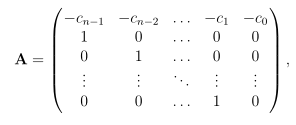 

t.j. v prvom riadku sú koeficienty polynómu so zápornými znamienkami, v prvej poddiagonále sú jednotky a ostatné prvky sú nuly. V Python-e takto počíta korene polynómu funkcia `roots()` z balíka *NumPy*.  

---

#### <font color=blue> Príklad 3 </font> 

In [14]:
# definovanie polynomu p1 pomocou jeho koeficientov 
p1 = np.poly1d([1, 2, 3, 4]) 
print('p1(x) = ')
print(p1) 
print('') 
# korene polynomu p1 
roots_p1 = p1.r 
print('korene polynomu p1: ',roots_p1) 

print('') 
print('===============================================================================================================')
print('') 

# definovanie polynomu p2 pomocou jeho koeficientov 
p2 = np.poly1d([1, 2, -15]) 
print('p2(x) = ')
print(p2) 
print('') 
# korene polynomu p2 
roots_p2 = p2.r 
print('korene polynomu p2: ',roots_p2) 

p1(x) = 
   3     2
1 x + 2 x + 3 x + 4

korene polynomu p1:  [-1.65062919+0.j         -0.1746854 +1.54686889j -0.1746854 -1.54686889j]


p2(x) = 
   2
1 x + 2 x - 15

korene polynomu p2:  [-5.  3.]


--- 

***
<a id=nasobnost></a>
 # <font color=brown> Násobnosť a diagonalizovateľnosť </font> 

**_Algebraická násobnosť_** vlastného čísla je jeho násobnosť ako koreňa charakteristickej rovnice. Pokiaľ je algebraická násobnosť vlastného čísla rovná jednej, tak ovoríme, že vlastné číslo je **_jednoduché_**. Ak je násobnosť väčšia ako jedna, potom hovoríme o **_násobnom_** vlastnom čísle. 

**_Geometrická násobnosť_** vlastného čísla je počet lineárne nezávislých vlastných vektorov prislúchajúcich k danému vlastnému číslu. Geometrická násobnosť je teda vždy menšia alebo rovná algebraickej násobnosti. 

---

#### <font color=green> Tvrdenie 1 </font> 

Nech $\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_n$ sú vlastné vektory matice $\mathbf{A}$ prislúchajúce k rôznym vlastným číslam $\lambda_1,\lambda_2,\ldots,\lambda_n$. Potom vektory $\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_n$ sú lineárne nezávislé. 

---

--- 

#### Poznámka 2 

Ak má matica $\mathbf{A}$ $n$ rôznych vlastných čísel, potom prislúchajúcich $n$ vlastných vektorov je lineárne nezávislých a teda tvoria bázu $\mathbf{C}^n$. Všimnime si ale, že $n$ rôznych vlastných čísel je postačujúca, avšak nie nutná podmienka k tomu, aby $n$ vlastných vektorov tvorilo bázu - stačí vziať napr. $\mathbf{A}=\mathbf{I}$ s vlastnými vektormi $\mathbf{e}_1,\mathbf{e}_2,\ldots,\mathbf{e}_n$ (stĺpce matice $\mathbf{I}$).   

---

---

### <font color=red> Definícia 2 </font> 

O vlastnom čísle matice hovoríme, že je **_defektné_**, ak je jeho geometrická násobnosť menšia ako algebraická násobnosť. 

Ak je geometrická násobnosť vlastného čísla totožná s jeho algebraickou násobnosťou, tak o vlastnom čísle hovoríme, že je **_nedefektné_**.  

Matica, ktorá má všetky vlastné čísla nedefektné sa nazýva **_nedefektná_**. Pokiaľ matica obsahuje aspoň jedno defektné vlastné číslo, potom sa nazýva **_defektná_**. 

---

--- 

#### Poznámka 3 

Dá sa ukázať, že nedefektná matica $\mathbf{A}$ rádu $n$ má práve $n$ lineárne nezávislých vlastných vektorov $\mathbf{x}_1,\ldots,\mathbf{x}_n$ prislúchajúcich k vlastným číslam $\lambda_1,\ldots,\lambda_n$ (niekedy sa zvykne hovoriť, že taká matica má *úplný systém vlastných vektorov*). 

---

---

#### <font color=green> Tvrdenie 2 </font> 

Nech $\mathbf{A}$ je $n\times n$ matica nad poľom komplexných čísel. Potom $\mathbf{A}$ je nedefektná (má **_úplný systém vlastných vektorov_**) vtedy a len vtedy, keď $\mathbf{X}$ je regulárna matica taká, že $\mathbf{X}^{-1}\mathbf{A}\mathbf{X}=\mathrm{diag}(\lambda_1,\lambda_2,\ldots,\lambda_n)$, kde $\lambda_i$, $i=1,2,\ldots,n$ sú vlastné čísla matice $\mathbf{A}$, pričom $i$-ty stĺpec matice $\mathbf{X}$ je vlastný vektor odpovedajúci vlastnému číslu $\lambda_i$ a $i$-ty riadok matice $\mathbf{X}^{-1}$ je ľavý vlastný vektor prislúchajúci k $\lambda_i$. 

---

<font color=purple> EXTRA: Nájdite príklad defektnej i nedefektnej matice (overte v Python-e). Za správne riešenie môžete získať jeden bonusový bod. </font>

Nech $\mathbf{D}=\mathrm{diag}(\lambda_1,\ldots,\lambda_n)$ a $\mathbf{X}=(\mathbf{x}_1,\ldots,\mathbf{x}_n)$, pričom vlastný vektor $\mathbf{x}_i$ zodpovedá vlastnému číslu $\lambda_i$, $i=1,2,\ldots,n$. Potom matica $\mathbf{X}$ je regulárna a platí 

$$\mathbf{A}\mathbf{X}=\mathbf{X}\mathbf{D}, \quad \text{ takže } \quad \mathbf{X}^{-1}\mathbf{A}\mathbf{X}=\mathbf{D} \quad \text{ a } \quad \mathbf{A}=\mathbf{X}\mathbf{D}\mathbf{X}^{-1}.$$ 

Vidíme teda, že nedefektnú maticu $\mathbf{A}$ je možné pomocou transformácie $\mathbf{X}^{-1}\mathbf{A}\mathbf{X}$ previesť na diagonálnu maticu. Matice s touto vlastnosťou sa nazývajú **_diagonalizovateľné_**. 

Vyjadrenie matice $\mathbf{A}$ v tvare $\mathbf{A}=\mathbf{X}\mathbf{D}\mathbf{X}^{-1}$, kde $\mathbf{D}$ je diagonálna matica, nazývame **_spektrálnym rozkladom_** matice $\mathbf{A}$ (ang. *spectral decomposition* alebo *eigenvalue decomposition*). Totiž vzťah $\quad \mathbf{X}^{-1}\mathbf{A}\mathbf{X}=\mathbf{D}$ vlastne znamená, že **matica $\mathbf{A}$ je podobná s maticou $\mathbf{D}$** a teda majú **rovnaké vlastné čísla** tvoriace práve diagonálu matice $\mathbf{D}$. 

***
<a id=lokalizacia></a>
 # <font color=brown> Lokalizácia vlastných čísel </font> 

Z teórie vieme, že **symetrická matica je diagonizovateľná, má reálne vlastné čísla a vlastné vektory prislúchajúce rôznym vlastným číslam sú navzájom ortogonálne**. Navyše vlastné vektory prislúchajúce násobnému vlastnému číslu je možné ortogonalizovať. Symetrická matica $\mathbf{A}$ je teda diagonalizovateľná pomocou ortonormálnej matice vlastných vektorov, t.j. existuje ortonormálna matica $\mathbf{X}$ vlastných vektorov s vlastnosťou $\mathbf{X}'\mathbf{A}\mathbf{X}=\mathbf{D}$. Platí nasledujúce tvrdenie: 

---

#### <font color=green> Tvrdenie 3 </font> 

Symetrická matica je pozitívne definitná práve vtedy, keď má všetky vlastné čísla kladné. 

---

Keďže pre spektrálny polomer matice $\mathbf{A}$ platí $\varrho(\mathbf{A})\le\lVert\mathbf{A}\rVert$, tak všetky vlastné čísla matice $\mathbf{A}$ ležia v komplexnej rovine v kruhu so stredom v počiatku súradnicovej sústavy a s polomerom rovným $\lVert\mathbf{A}\rVert$.  

---

### <font color=green> Veta 1 (Gerschgorinova) </font> 

Nech $\mathbf{A}\in\mathbb{C}^{n\times n}$. Potom každé vlastné číslo matice $\mathbf{A}$ leží v zjednotení kruhov (v komplexnej rovine) 

$$\bigcup\limits_{j=1}^{n}K_{r_j}(a_{jj}), \quad \text{ kde } K_{r_j}=\left\{z\in\mathbb{C}:\,|z-a_{jj}|\le r_j\right\}, \quad j=1,2,\ldots,n,$$

pričom stredy $a_{jj}$ kruhov sú diagonálne prvky matice $\mathbf{A}$ a polomery $r_j$ kruhov možno vziať v nasledujúcich  tvaroch:  

\begin{align*}\label{eq:Eigen4} \tag{4}
r_j=\displaystyle\sum\limits_{k=1,k\neq j}^{n}|a_{jk}|, \quad j=1,2,\ldots,n;  
\end{align*}

\begin{align*}\label{eq:Eigen5} \tag{5}
r_j=\displaystyle\sum\limits_{k=1,k\neq j}^{n}|a_{kj}|, \quad j=1,2,\ldots,n;  
\end{align*}

\begin{align*}\label{eq:Eigen6} \tag{6}
r_j=r=\left(\displaystyle\sum\limits_{j,k=1,\\j\neq k}^{n}|a_{jk}|^2\right)^{1/2}, \quad j=1,2,\ldots,n;  
\end{align*}

---

--- 

#### Poznámka 4 

Aplikáciou vzťahu $(4)$ z Vety 1 na maticu $\mathbf{A}'$ vidíme, že podobný výsledok platí tiež pre kruhy so stredmi $a_{kk}$ a s polomermi $\displaystyle\sum\limits_{k=1,k\neq j}^{n}|a_{kj}|$, čím vznikne vzťah $(5)$ vo Vete 1. 

---

---

#### <font color=blue> Príklad 4 </font> 

Je daná matica $\mathbf{A}=\begin{pmatrix}2&1&1/2\\-1&-3i&1\\3&-2&-6\end{pmatrix}$. Zrejme pre stredy a polomery kruhov podľa Vety 1 platí 

\begin{align*} 
a_{11}=2&, \quad r_1=3/2, \\
a_{22}=-3i&, \quad r_2=2, \\ 
a_{33}=-6&, \quad r_3=5. 
\end{align*}

Vlastné hodnoty matice $\mathbf{A}$, vzhľadom k Vete 1, patria do zjednotenia uvedených kruhov. Tak napr. $\rho(\mathbf{A})\le11$. Naviac $\mathbf{A}$ je regulárna, keďže žiadne jej vlastné číslo nemôže byť nula (viď obrázok). 

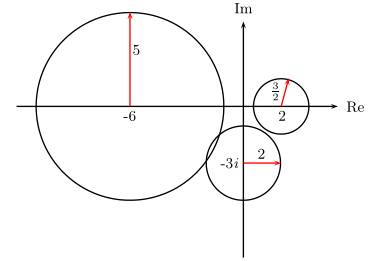 
$$\text{Zdroj: Ackleh et al. (2009).}$$

---

<font color=purple> EXTRA: Ilustrujte Gerschgorinovu vetu na vlastnom príklade a pokúste sa urobiť vizualizáciu v Python-e. Za korektný príklad vrátane vizualizácie môžete získať jeden bonusový bod. </font>

--- 

Na záver tejto časti pripájame ešte niekoľko poznatkov ohľadom **_Hermitovskych matíc_**. Ide o také (komplexné) matice $\mathbf{A}$, ktoré spĺňajú vzťah $\mathbf{A}^H=\mathbf{A}$. Zrejme reálne symetrické matice sú špeciálnym prípadom Hermitovskych matíc. 

---

### <font color=green> Veta 2 </font> 

Nech $\mathbf{A}$ je Hermitovska matica (alebo reálna symetrická). Potom vlastné čísla matice $\mathbf{A}$ sú reálne a príslušné vlastné vektory tvoria ortonormálny systém. 

---

--- 

#### Poznámka 5 

Ortonormálny systém vektorov tvoria lineárne nezávislé vektory, ktoré vygenerujú (ich lineárne kombinácie) akýkoľvek vektor z  $\mathbb{C}^n$ a teda celé $\mathbb{C}^n$. Tým pádom každý vektor $\mathbf{x}\in\mathbb{C}^n$ sa dá vyjadriť v tvare 

$$\mathbf{x}=\displaystyle\sum\limits_{j=1}^{n}a_j\mathbf{x}_j, \quad \text{ kde } a_j=(\mathbf{x},\mathbf{x}_j) \quad \text{ a } \lVert\mathbf{x}\rVert_2^2=\displaystyle\sum\limits_{i=1}^{n}|a_j|^2.$$

---

---

### <font color=green> Veta 3 </font> 

Sú dané Hermitovske matice $\mathbf{A}$, $\mathbf{B}$. Potom vlastné čísla $\lambda_j(\mathbf{A})$, $\lambda_j(\mathbf{B})$, $j=1,2\ldots,n$ usporiadané v poradí $\lambda_1(\mathbf{A})\ge\lambda_2(\mathbf{A})\ge\ldots\ge\lambda_n(\mathbf{A})$, $\lambda_1(\mathbf{B})\ge\lambda_2(\mathbf{B})\ge\ldots\ge\lambda_n(\mathbf{B})$ spĺňajú nasledujúcu nerovnosť: 

$$|\lambda_j(\mathbf{A})-\lambda_j(\mathbf{B})|\le\lVert\mathbf{A}-\mathbf{B}\rVert, \quad j=1,2,\ldots,n,$$ 

pričom táto nerovnosť platí pre každú maticovú normu súhlasnú s vektorovou normou, tzn. $\lVert\mathbf{A}\mathbf{x}\rVert\le\lVert\mathbf{A}\mathbf{x}\rVert$. 

---

--- 

#### Poznámka 6 

Ak sú prvky matíc $\mathbf{A}$, $\mathbf{B}$ podobné resp. blízke, potom predchádzajúca veta hovorí o tom, že aj vlastné čísla týchto matíc sú si navzájom blízke. 

---

---

#### <font color=green> Dôsledok 1 (Gerschgorinova veta pre Hermitovske matice) </font> 

Ak $\mathbf{A}$ je Hermitovska alebo reálna symetrická matica, potom existuje jednoznačné priradenie medzi kruhmi $K_r(a_{jj})$ a vlastnými hodnotami $\lambda_j$ zo spektra $\lambda_1,\ldots,\lambda_n$ matice $\mathbf{A}$, pričom platí 

$$r=\underset{j}{\max}\displaystyle\sum\limits_{k=1,k\neq j}^{n}|a_{jk}| \quad \text{ alebo } \quad r=\left(\displaystyle\sum\limits_{j,k=1,\\j\neq k}^{n}|a_{jk}|^2\right)^{1/2}$$

---

---

#### <font color=blue> Príklad 5 </font>  

Je daná matica $\mathbf{A}=\begin{pmatrix}3&-1&1\\-1&15&1\\1&1&10\end{pmatrix}$. Zrejme $a'_{11}=15$, $a'_{22}=10$, $a'_{33}=3$. Aplikáciou Dôsledku 1 dostávame 

$$\underset{j}{\max}\displaystyle\sum\limits_{k=1, k\neq j}^{n}|a_{jk}|=2 \quad \text{ a } \quad \left(\displaystyle\sum\limits_{j,k=1\\ j\neq k}^{n}|a_{jk}|^2 \right)^{1/2}=6^{1/2},$$ 

takže môžeme vziať $r=2$. Tým pádom máme nasledovné odhady pre lokalizáciu vlastných čísel matice $\mathbf{A}$: $13\le\lambda_1\le17$, $8\le\lambda_2\le12$, $1\le\lambda_3\le5$. 


In [3]:
from numpy.linalg import eig 

A = np.array([[3, -1, 1],
              [-1,15,1],
              [1, 1, 10]])
print('A = ') 
print(A) 
print('')
eigval, eigvec = eig(A)
print('vlastne cisla:') 
print(eigval) 

A = 
[[ 3 -1  1]
 [-1 15  1]
 [ 1  1 10]]

vlastne cisla:
[ 2.755002 10.       15.244998]


--- 

***
<a id=podmienenost></a>
 # <font color=brown> Podmienenosť </font> 

**Podmienenosť vlastných čísel a vlastných vektorov vyjadruje ich citlivosť voči malým zmenám koeficientov príslušnej matice.**

Ako reprezentatívnu ilustráciu preskúmame citlivosť vlastných čísel diagonalizovateľej matice $\mathbf{A}$, takže $\mathbf{X}^{-1}\mathbf{A}\mathbf{X}=\mathbf{D}$, kde $\mathbf{X}$ je matica vlastných vektorov a $\mathbf{D}$ je diagonálna matica príslušných vlastných čísel. Nech $\Delta\mathbf{A}\equiv\mathbf{E}$ je malá zmena matice $\mathbf{A}$, $\mu$ je ľubovoľné vlastné číslo pozmenenej matice $\mathbf{A}+\mathbf{E}$ a $\mathbf{F}=\mathbf{X}^{-1}\mathbf{E}\mathbf{X}$. Potom 

$$\mathbf{X}^{-1}(\mathbf{A}+\mathbf{E})\mathbf{X}=\mathbf{X}^{-1}\mathbf{A}\mathbf{X}+\mathbf{X}^{-1}\mathbf{E}\mathbf{X}=\mathbf{D}+\mathbf{F},$$ 

takže matice $\mathbf{A}+\mathbf{E}$, $\mathbf{D}+\mathbf{F}$ sú podobné a teda majú rovnaké vlastné čísla. Preto existuje vlastný vektor $\mathbf{v}$ matice $\mathbf{D}+\mathbf{F}$ prislúchajúci vlastnému číslu $\mu$, takže $(\mathbf{D}+\mathbf{F})\mathbf{v}=\mu\mathbf{v}$, čo sa dá zapísať v tvare 

$$\mathbf{v}=(\mu\mathbf{I}-\mathbf{D})^{-1}\mathbf{F}\mathbf{v}$$ 

za predpokladu, že $\mu$ nie je vlastné číslo matice $\mathbf{D}$ (a teda ani matice $\mathbf{A}$, čo je prijateľný predpoklad odpovedajúci situácii, keď zmena $\mathbf{A}$ vyvolá zmenu všetkých vlastných čísel). Odtiaľ máme 

$$\lVert\mathbf{v}\rVert_p\le\left\lVert(\mu\mathbf{I}-\mathbf{D})^{-1}\right\rVert_p\cdot\lVert\mathbf{F}\rVert_p\cdot\lVert\mathbf{v}\rVert_p \quad \text{ a teda } \left\lVert(\mu\mathbf{I}-\mathbf{D})^{-1}\right\rVert^{-1}_p\le\lVert\mathbf{F}\rVert_p.$$ 

Keďže pre diagonálnu maticu $\mathbf{C}=\mathrm{diag}(c_1,c_2,\ldots,c_n)$ a $p\in\langle1,\infty)$ je $\lVert\mathbf{C}\rVert_p=\underset{i}{\max|c_i|}$, tak dostávame $\left\lVert(\mu\mathbf{I}-\mathbf{D})^{-1}\right\rVert_p=\dfrac{1}{|\mu-\lambda_k|}$, kde $\lambda_k$ je vlastné číslo matice $\mathbf{D}$ (a teda i matice $\mathbf{A}$) najbližšie k $\mu$. 

Celkov teda máme 

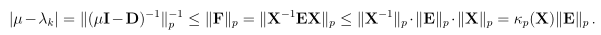 

Dokázali sme vlastne nasledujúce tvrdenie. 


---

### <font color=green> Veta 4 (Bauerova-Fikova) </font> 

Nech $\mathbf{A}$ je diagonalizovateľná matica, tzn. $\mathbf{X}^{-1}\mathbf{A}\mathbf{X}=\mathbf{D}$, kde $\mathbf{X}$ je regulárna matica (vlastných vektorov $\mathbf{A}$) a $\mathbf{D}$ je diagonálna matica (príslušných vlastných čísel $\mathbf{A}$). Potom pre každé $\mu\in\lambda(\mathbf{A}+\Delta\mathbf{A})$ existuje $\lambda\in\lambda(\mathbf{A})$ také, že $|\mu-\lambda|\le\kappa_p(\mathbf{X})\lVert\Delta\mathbf{A}\rVert_p$

---

--- 

#### Poznámka 7 

* Veta 4 v podstate hovorí, že citlivosť vlastných čísel diagonalizovateľnej matice $\mathbf{A}$ sa dá odhadnúť číslom podmienenosti $\kappa_p(\mathbf{X})=\lVert\mathbf{X}\rVert_p\cdot\left\lVert\mathbf{X}^{-1}\right\rVert_p$ matice jej vlastných vektorov. 


* Odtiaľ plynie, že vlastné čísla matice $\mathbf{A}$ môžu byť veľmi citilivé na zmeny koeficientov matice, pokiaľ sú vlastné vektory takmer lineárne závislé (t.j. matica je takmer defektná).  


* Priaznivá situácia nastáva pre symetrické matice. K nim totiž vždy existuje ortonormálna matica $\mathbf{X}$ vlastných vektorov, takže $\kappa_2(\mathbf{X})=1$, čo znamená, že **vlastné čísla symetrických matíc sú vždy dobre podmienené**.  

---

<font color=purple> EXTRA: Ilustrujte Bauerovu-Fikovu vetu na vlastnom príklade. Za správny postup je možné získať jeden bonusový bod. </font>

**Bauerova-Fikova veta popisuje citlivosť všetkých vlastných čísel jedným vzorcom. Citlivosť jednotlivých vlastných čísel však môže byt značne odlišná.** Poďme teda preskúmať citlivosť individuálneho vlastného čísla $\lambda$ na malú zmenu $\Delta\mathbf{A}\equiv\mathbf{E}$ matice $\mathbf{A}$. Nech $\mathbf{x}$ resp. $\mathbf{y}$ je pravý resp. ľavý vlastný vektor prislúchajúci k vlastnému číslu $\lambda$ a uvažujme pozmenený problém 

$$(\mathbf{A}+\mathbf{E})(\mathbf{x}+\Delta\mathbf{x})=(\lambda+\Delta\lambda)(\mathbf{x}+\Delta\mathbf{x}).$$

Výrazy na ľavej i pravej strane predchádzajúceho vzťahu roznásobime. Predpokladajme, že vlastné číslo $\lambda$ je jednoduché. Potom je možné členy $\mathbf{E}\Delta\mathbf{x}$, $\Delta\lambda\Delta\mathbf{x}$ považovať za dostatočne malé a zanedbať ich. Ak to urobíme a zohľadníme pri tom, že $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$, tak dostaneme približnú rovnosť 

$$\mathbf{A}\Delta\mathbf{x}+\mathbf{E}\mathbf{x}\approx\lambda\Delta\mathbf{x}+\Delta\lambda\mathbf{x}.$$

Po prenásobení oboch strán vektorom $\mathbf{y}'$, dostaneme 

$$\mathbf{y}'\mathbf{A}\Delta\mathbf{x}+\mathbf{y}'\mathbf{E}\mathbf{x}\approx\lambda\mathbf{y}'\Delta\mathbf{x}+\Delta\lambda\mathbf{y}'\mathbf{x}.$$ 

Keďže $\mathbf{y}$ je ľavý vlastný vektor, tak $\mathbf{y}'\mathbf{A}=\lambda\mathbf{y}'$, odkiaľ 

$$\mathbf{y}'\mathbf{E}\mathbf{x}\approx\Delta\lambda\mathbf{y}'\mathbf{x}.$$ 

Dá sa ukázať, že pre jednoduché vlastné číslo je $\mathbf{y}'\mathbf{x}\neq0$, preto 

$$\Delta\lambda\approx\dfrac{\mathbf{y}'\mathbf{E}\mathbf{x}}{\mathbf{y}'\mathbf{x}}.$$ 

Odtiaľ získame približný odhad pre $|\Delta\lambda|$ 

$$|\Delta\lambda|\lessapprox\dfrac{\lVert\mathbf{y}\rVert_2\cdot\lVert\mathbf{x}\rVert_2}{|\mathbf{y}'\mathbf{x}|}\lVert\mathbf{E}\rVert_2=\dfrac{1}{|\cos\theta_\lambda|}\lVert\mathbf{E}\rVert_2,$$ 

kde $\theta_\lambda$ je uhol, ktorý zvierajú ľavý a pravý vlastný vektor prislúchajúce k vlastnému číslu $\lambda$. 

Ukázali sme teda, že pre jednoduché vlastné číslo $\lambda$ matice $\mathbf{A}$ a odpovedajúce vlastné číslo $\lambda+\Delta\lambda$ mierne modifikovanej matice $\mathbf{A}+\Delta\mathbf{A}$ približne platí 

\begin{align*}\label{eq:Eigen7} \tag{7}
|\Delta\lambda|\lesssim\kappa(\lambda)\lVert\Delta\mathbf{A}\rVert_2, \quad \text{ kde } \kappa(\lambda)=\dfrac{1}{|\cos\theta_\lambda|}
\end{align*}

je tzv. **_číslo podmienenosti vlastného čísla $\lambda$ matice $\mathbf{A}$_**. 


--- 

#### Poznámka 8  

* Všimnime si, že pre symetrickú maticu a jej jednoduché vlastné číslo platí $\mathbf{x}=\mathbf{y}$, tým pádom $\theta_\lambda=0$ a príslušné číslo podmienenosti $\kappa(\lambda)$ je rovné $1$. Pokiaľ by boli pravý a ľavý vektor takmer kolmé na seba, potom by číslo podmienenosti $\kappa(\lambda)$ bolo veľké, takže zmena $\Delta\lambda$ vlastného čísla $\lambda$ vyvolaná malou zmenou $\Delta\mathbf{A}$ matice $\mathbf{A}$ by bola veľká. 


* Analýza podmienenosti násobných vlastných čísel je zložitejšia. Napr. platí, že násobné alebo takmer násobné vlastné čísla sú zle podmienené. Taktiež analýza citlivosti vlastných vektorov je pomerne zložitá. Ukazuje sa, že keď má matica dobre podmienené a navzájom dostatočne vzdialené vlastné čísla, potom sú vlastné vektory dobre podmienené. Pokiaľ sú ale vlastné čísla zle podmienené alebo keď existujú skupiny navzájom blízkych vlastných čísel, potom sú vlastné vektory zle podmienené. 

---

<font color=orange> K Vami zvolenej matici vypočítajte v Python-e čísla podmienenosti jej vlastných hodnôt. Nájdite tiež príklad matice, ktorá má i zle podmienené vlastné čísla (overte v Python-e). </font>

<font color=purple> EXTRA: Naprogramujte funkciu, ktorá vráti čísla podmienenosti pre jednotlivé vlastné hodnoty matice. Za správny, okomentovaný kód s testovacími príkladmi je možne získať dva bonusové body. </font>

***
<a id=transformacie></a>
 # <font color=brown> Transformácie </font> 

Mnohé numerické metódy pre výpočet vlastných čísel a vektorov sú založené na redukcii pôvodnej matice na inú jednoduchšiu  maticu, ktorej vlastné čísla a vlastné vektory sa dajú ľahšie vypočítať. Uvedieme preto niekoľko transformácií, ktoré vlastné čísla i vlastné vektory buď nemenia alebo umožnujú ich jednoduchú rekonštrukciu. 

**Posun** - znamená odčítanie konštanty od diagonálnych prvkov matice. Totiž, ak $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$ a $\mu$ je konštanta, potom $(\mathbf{A}-\mu\mathbf{I})\mathbf{x}=(\lambda-\mu)\mathbf{x}$. Teda vlastné čísla matice $\mathbf{A}-\mu\mathbf{I}$ sa oproti vlastným číslam matice $\mathbf{A}$ posunú o $\mu$, no vlastné vektory sa nezmenia. 

**Inverzia** - ak je $\mathbf{A}$ regulárna a $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$, tak $\lambda\neq0$ a $\mathbf{A}^{-1}\mathbf{x}=(1/\lambda)\mathbf{x}$. Teda vlastné čísla matice $\mathbf{A}^{-1}$ sú prevrátené hodnoty vlastných čísel matice $\mathbf{A}$, pričom vlastné vektory oboch matíc sú rovnaké. 

**Mocniny** - ak $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$, potom $\mathbf{A}^k\mathbf{x}=\lambda\mathbf{A}^{k-1}\mathbf{x}=\ldots=\lambda^k\mathbf{x}$ pre $k\in\mathbb{N}$. Čiže $k$-ta mocnina matice má za vlastné čísla $k$-te mocniny vlastných čísel pôvodnej matice. Vlastné vektory sa nemenia. 

**Polynómy** - nech $p(t)=c_0+c_1t+c_2t^2+\ldots+c_kt^k$ je ľubovoľný polynóm stupňa $k$, potom definujeme $p(\mathbf{A})=c_0\mathbf{I}+c_1\mathbf{A}+c_2\mathbf{A}^2+\ldots+c_k\mathbf{A}^k$. Ak $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$, tak $p(\mathbf{A})\mathbf{x}=p(\lambda)\mathbf{x}$. Matica $p(\mathbf{A})$, kde $p(t)$ je polynóm, má vlastné čísla $p(\lambda)$, pričom vlastné vektory matíc $\mathbf{A}$, $p(\mathbf{A})$ sú totožné. 

**Podobnosť** - matice $\mathbf{A}$, $\mathbf{B}$ sú **_podobné_**, keď existuje regulárna matica $\mathbf{T}$ s vlastnosťou $\mathbf{B}=\mathbf{T}^{-1}\mathbf{A}\mathbf{T}$. Matica $\mathbf{T}$ sa nazýva **_matica podobnosti_** alebo tiež **_podobnostná matica_**. Ak je $\lambda$ vlastné číslo matice $\mathbf{B}$ a $\mathbf{y}$ je odpovedajúci vlastný vektor, tak 

$$\mathbf{B}\mathbf{y}=\lambda\mathbf{y}\Longrightarrow\mathbf{T}^{-1}\mathbf{A}\mathbf{T}\mathbf{y}=\lambda\mathbf{y}\Longrightarrow\mathbf{A}\mathbf{T}\mathbf{y}=\lambda\mathbf{T}\mathbf{y}\Longrightarrow\mathbf{A}\mathbf{x}=\lambda\mathbf{x} \quad \text{pre} \quad \mathbf{x}=\mathbf{T}\mathbf{y}.$$

**Vlastné čísla podobných matíc sú teda rovnaké.** Vlastné vektory prislúchajúce tomu istému vlastnému číslu sú síce rôzne, no jeden z druhého je možné ľahko získať pomocou matice podobnosti. 

***
<a id=specialne></a>
 # <font color=brown> Špeciálne matice </font> 

### Diagonálne matice 

Diagonálna matica $\mathbf{D}=\mathrm{diag}(d_1,d_2,\ldots,d_n)$ má vlastné čísla $\lambda_i=d_i$ a odpovedajúce vlastné vektory $\mathbf{y}_i=\mathbf{e}_i$, kde $\mathbf{e}_i$ je $i$-tý stĺpec jednotkovej matice. 

Diagonalizovateľnú maticu $\mathbf{A}$ je možné pomocou podobnostnej transformácie $\mathbf{T}^{-1}\mathbf{A}\mathbf{T}=\mathbf{D}$ previesť na diagonálnu maticu $\mathbf{D}$. Keďže vlastné čísla môžu byť komplexné, sú aj matice $\mathbf{D}$, $\mathbf{T}$ vo všeobecnosti komplexné. Pre symetrickú maticu $\mathbf{A}$ však existuje reálna ortonormálna matica podobnosti $\mathbf{Q}$ taká, že matica $\mathbf{Q}'\mathbf{A}\mathbf{Q}=\mathbf{D}$ je diagonálna. 

### Trojuholníkové matice 

Trojuholníková matica má nuly buď pod hlavnou diagonálou - vtedy hovoríme o **_hornej trojuholníkovej matici_** alebo má nuly nad hlavnou diagonálou, vtedy hovoríme o **_dolnej trojuholníkovej matici_**. Ďalej budeme pod označením trojuholníková matica myslieť hornú trojuholníkovú maticu. Nech teda $\mathbf{T}=\left\{t_{ij}\right\}_{i,j=1}^{n}$ je trojuholníková matica, tzn. $t_{ij}=0$ pre $i>j$. Z charakteristickej rovnice $\det(\mathbf{T}-\lambda\mathbf{I})=0$ okamžite vyplýva, že vlastné čísla matice $\mathbf{T}$ sú jej diagonálne prvky, t.j. $\lambda_i=t_{ii}$. Vlastné vektory sa tiež dajú ľahko dopočítať. Totiž matica $\mathbf{T}-\lambda\mathbf{I}$ má na hlavnej diagonále nuly na pozíciach, v ktorých $t_{ii}=\lambda$. Ak 

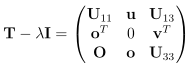 

$\mathbf{U}_{11}$ je regulárna matica, tak odpovedajúci vlastný vektor sa dá zvoliť v tvare 

$$\mathbf{x}=\begin{pmatrix}\mathbf{y}\\-1\mathbf{0}\end{pmatrix},$$

kde $\mathbf{y}$ je riešenie rovnice $\mathbf{U}_{11}\mathbf{y}=\mathbf{u}$. 

Význam trojuholníkových matíc v úlohe vlastných čísel plynie zo *Schurovej vety*.

---

### <font color=green> Veta 5 (Schurova) </font> 

Ku každej štvorcovej matici $\mathbf{A}$ exituje [unitárna matica](https://mathworld.wolfram.com/UnitaryMatrix.html) $\mathbf{Q}$ taká, že 

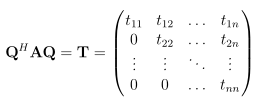 

je horná trojuholníková matica. Rozklad $\mathbf{A}=\mathbf{Q}\mathbf{T}\mathbf{Q}^{H}$ sa nazýva **_Schurov rozklad matice_** $\mathbf{A}$, $\mathbf{T}$ sa nazýva **_Schurov tvar matice_** a stĺpce $\mathbf{q}_1,\mathbf{q}_2,\ldots,\mathbf{q}_n$ matice $\mathbf{Q}$ sa nazývajú **_Schurove vektory_**.

---

Keďže $\mathbf{Q}^{H}=\mathbf{Q}^{-1}$, tak každá štvorcová matica $\mathbf{A}$ je podobná s trojuholníkovou maticou $\mathbf{T}=\mathbf{Q}^{-1}\mathbf{A}\mathbf{Q}$, pričom matica podobnosti je unitárna. Uvedomme si, že matice $\mathbf{T}$, $\mathbf{Q}$ sú vo všeobecnosti komplexné. 

Schurov tvar reálnej matice má komplexné zložky v prípade, že matica má nejaké komplexné vlastné čísla. Naštastie však existuje reálny variant Schurovej vety.

---

### <font color=green> Veta 6 (Schurova - reálny variant) </font> 

Ku každej reálnej štvorcovej matici $\mathbf{A}$ exituje [ortonormálna matica](https://web1.eng.famu.fsu.edu/~dommelen/courses/aim/aim03/topics/linalg/matrices/inv/node2.html) $\mathbf{Q}$ taká, že 

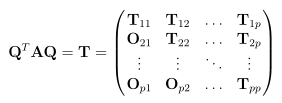  

je blokovo trojuholníková reálna matica, kde diagonálne submatice $\mathbf{T}_{ii}$ sú štvorcové matice rádu jedna alebo dva a poddiagonálne submatice $\mathbf{O}_{ij}$, $i>j$ sú nulové. Vlastné čísla diagonálnych submatíc rádu dva sú komplexne združené vlastné čísla matice $\mathbf{A}$, ostatné diagonálne submatice rádu jedna sú reálne vlastné čísla matice $\mathbf{A}$. Rozklad $\mathbf{A}=\mathbf{Q}\mathbf{T}\mathbf{Q}'$ sa nazýva **_reálny Schurov rozklad matice_** $\mathbf{A}$, ďalej matica $\mathbf{T}$ sa nazýva **_reálny Schurov tvar matice_** $\mathbf{A}$, stĺpce $\mathbf{q}_1,\mathbf{q}_2,\ldots,\mathbf{q}_n$ matice $\mathbf{Q}$ sú **_reálne Schurove vektory_**. 

---

---

#### <font color=blue> Príklad 6 </font> 

In [11]:
from scipy.linalg import schur, eigvals 

# realne vlastne cisla realnej matice 
A = np.array([[0, 2, 2], [0, 1, 2], [1, 0, 1]])
print('A = ') 
print(A) 
print('')

T, Q = schur(A)
print('T = ')
print(T) 
print('')
Q = Q.T 
print('Q = ') 
print(Q) 
print('') 

# overenie, ze ide naozaj o (Schurov) rozklad matice A 
print('(Q^T)TQ = ')
print(Q.T @ T @ Q)  
print('') 

# overenie ortonormality matice Q 
print('(Q^T)Q = ')
print(Q.T @ Q) 
print('') 
print('Q(Q^T) = ') 
print(Q @ Q.T)

A = 
[[0 2 2]
 [0 1 2]
 [1 0 1]]

T = 
[[ 2.65896708  1.42440458 -1.92933439]
 [ 0.         -0.32948354 -0.49063704]
 [ 0.          1.31178921 -0.32948354]]

Q = 
[[ 0.72711591  0.52839428  0.43829436]
 [-0.60156188  0.79801892  0.03590414]
 [ 0.33079564  0.28976765 -0.89811411]]

(Q^T)TQ = 
[[-7.70388160e-16  2.00000000e+00  2.00000000e+00]
 [-4.34679020e-16  1.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00 -2.40639081e-16  1.00000000e+00]]

(Q^T)Q = 
[[ 1.00000000e+00 -2.69114819e-16 -1.43412226e-16]
 [-2.69114819e-16  1.00000000e+00 -1.17557284e-16]
 [-1.43412226e-16 -1.17557284e-16  1.00000000e+00]]

Q(Q^T) = 
[[1.00000000e+00 7.15729844e-17 1.48863408e-16]
 [7.15729844e-17 1.00000000e+00 7.99054924e-17]
 [1.48863408e-16 7.99054924e-17 1.00000000e+00]]


In [15]:
# komplexne vlastne cisla realnej matice 
T2, Q2 = schur(A, output='complex')
Q2 = Q2.conjugate().T # komplexne zdruzena matica sa transponuje 
print('T2 = ')
print(T2) 
print('') 
print('Q2 = ')
print(Q2)
print('')

# vlastne cisla (matice A) z diagonaly matice T2 
eigValT2 = eigvals(T2)
print('vlastne cisla matice T2: ') 
print(eigValT2) 
print('')
eigValA = eigvals(A) 
print('vlastne cisla matice A: ') 
print(eigValA) 
print('') 

# overenie unitarnosti matice Q2 
print('(Q2^H)Q2 = ') 
print(Q2.conjugate().T @ Q2) 
print('Q2(Q2^H) = ') 
print(Q2 @ Q2.conjugate().T)

T2 = 
[[ 2.65896708+0.j         -1.22839825+1.32378589j  0.42590089+1.51937378j]
 [ 0.        +0.j         -0.32948354+0.80225456j -0.59877807+0.56192146j]
 [ 0.        +0.j          0.        +0.j         -0.32948354-0.80225456j]]

Q2 = 
[[ 0.49509131-0.53252431j  0.35978227-0.38698479j  0.29843347-0.32099752j]
 [ 0.38619715+0.17028504j  0.05442058-0.48114416j -0.70629614+0.29755542j]
 [ 0.42941895+0.32978264j -0.6930128 -0.07791943j  0.12308315-0.45316126j]]

vlastne cisla matice T2: 
[ 2.65896708+0.j         -0.32948354+0.80225456j -0.32948354-0.80225456j]

vlastne cisla matice A: 
[ 2.65896708+0.j         -0.32948354+0.80225456j -0.32948354-0.80225456j]

(Q2^H)Q2 = 
[[ 1.00000000e+00+0.00000000e+00j -2.35922393e-16+1.11022302e-16j
   5.41233725e-16+8.32667268e-17j]
 [-2.35922393e-16-1.11022302e-16j  1.00000000e+00+0.00000000e+00j
   4.05925293e-16-5.55111512e-17j]
 [ 5.41233725e-16-8.32667268e-17j  4.05925293e-16+5.55111512e-17j
   1.00000000e+00+0.00000000e+00j]]
Q2(Q2^H) = 
[[ 1.

--- 

### Blokovo trojuholníkové matice 

Reálny tvar Schurovej matice je špeciálnym prípadom hornej blokovej trojuholníkovej matice 

\begin{align*}\label{eq:Eigen8} \tag{8}
\mathbf{A}=\begin{pmatrix}\mathbf{A}_{11}&\mathbf{A}_{12}&\ldots&\mathbf{A}_{1p}\\ 
\mathbf{O}_{21}&\mathbf{A}_{22}&\ldots&\mathbf{A}_{2p}\\ \vdots&\vdots&\ddots&\vdots\\ \mathbf{O}_{p1}&\mathbf{O}_{p2}&\ldots&\mathbf{A}_{pp}\end{pmatrix}
\end{align*}

so štvorcovými diagonálnymi maticami $\mathbf{A}_{ii}$ a nulovými poddiagonálnymi maticami $\mathbf{O}_{ij}$. Keďže determinant matice $\mathbf{A}$ je súčinom determinantov diagonálnych submatíc (dôsedok Laplaceovej vety), tak všetky vlastné čísla matice $\mathbf{A}$ sa dajú určiť pomocou vlastných vektorov diagonálnych submatíc. Problém vlastných čísel pre blokové trojuholníkové matice sa teda dá rozložiť na menšie sub-poblémy, ktoré sa riešia ľahšie a mnohé algoritmy výpočtu vlastných čísel to využívajú.  

***
<a id=metody></a>
 # <font color=brown> Metódy výpočtu </font>

Výpočtové metódy na lokalizáciu vlastných hodnôt matice sú prevažne založené na fundamentálnej myšlienke mocninnej iterácie, pričom ide o typ iterácie s pevným bodom v tzv. vlastných priestoroch. 

## Mocninná metóda, metóda inverznej iterácie 

Základný variant **_mocninovej metódy_** resp. **_mocninnej metódy_** (viď nasledujúce dva algoritmy uvedené nižšie) umožňuje výpočet vlastného vektora prislúchajúceho k vlastnému číslu s najväčšou absolútnou hodnotou. Tretí uvedený algoritmus dokáže určiť vlastný vektor prislúchajúci k vlastnému číslu s najmenšou absolútnou hodnotou. Pre zvolené číslo $\mu$, nájde tento tretí algoritmus vlastný vektor odpovedajúci vlastnému číslu, ktoré je najbližšie k $\mu$. Pokiaľ máme dobrú aproximáciu vlastného vektora, potom štvrtý uvedený algoritmus nájde hľadaný vlastný vektor. 

---

<b> <ins> Algoritmus </ins> </b> (Mocninná metóda)

**Krok 1** 

Vstup: matica $\mathbf{A}$, štartovací vektor $\mathbf{x}_0$; 

**Krok 2** 

Postupne pre $k=1,2,\ldots$ opakuj: 

* $\mathbf{x}_k:=\mathbf{A}\mathbf{x}_{k-1}$;

**Krok 3** 

Výstup: $\mathbf{x}_k$.   

---

Predpokladajme, že $\mathbf{A}$ je diagonalizovateľná matica s jedným dominantným vlastným číslom $\lambda_1$, t.j. 

\begin{align*}\label{eq:Eigen9} \tag{9}
|\lambda_1|>|\lambda_2|\ge|\lambda_3|\ge\ldots\ge|\lambda_n|
\end{align*} 

a nech $\mathbf{v}_1$ je odpovedajúci vlastný vektor. Alternatívne môžeme predpokladať, že matica $\mathbf{A}$ je nedefektná (teda má úplnú resp. kompletnú množinu vlastných vektorov), a že má jednoduché dominantné vlastné číslo. Potom postupnosť vektorov $\mathbf{x}_k$ z predošlého algoritmu  konverguje k násobku $\mathbf{v}_1$. Naznačíme dôkaz tohto tvrdenia. Štartovací vektor $\mathbf{x}_0$ vyjadríme v tvare $\mathbf{x}_0=\displaystyle\sum\limits_{j=1}^{n}\alpha_j\mathbf{v}_j$, kde $\mathbf{v}_j$ sú vlastné vektory (lineárne nezávislé - tvoria bázu $\mathbb{C}^n$) odpovedajúce vlastným číslam $\lambda_j$. Potom 

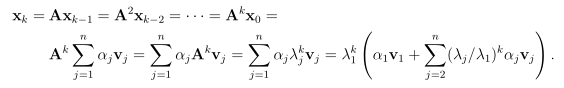 

Pre $j>1$ platí $|\lambda_j/\lambda_1|<1$, preto $(\lambda_j/\lambda_1)^k\to0$ a teda nevymizne iba člen obsahujúci $\mathbf{v}_1$. Vlastné číslo $\lambda_1$ je možné dopočítať pomocou tzv. *Rayleighovho podielu*. 

**_Rayleighov podiel_** pre maticu $\mathbf{A}$ a vektor $\mathbf{x}=\neq\mathbf{0}$ je číslo 

$$R(\mathbf{A},\mathbf{x})=\dfrac{\mathbf{x}'\mathbf{A}\mathbf{x}}{\mathbf{x}'\mathbf{x}}.$$

Pokiaľ $\mathbf{x}$ je vlastný vektor matice $\mathbf{A}$ a $\lambda$ je odpovedajúce vlastné číslo, potom 

$$R(\mathbf{A},\mathbf{x})=\dfrac{\mathbf{x}'\mathbf{A}\mathbf{x}}{\mathbf{x}'\mathbf{x}}=\dfrac{\mathbf{x}'\lambda\mathbf{x}}{\mathbf{x}'\mathbf{x}}=\lambda.$$

Ak teda $\mathbf{x}_k\to\mathbf{v}_1$, potom $R(\mathbf{A},\mathbf{x})\to\lambda_1$. Dá sa ukázať, že metóda konverguje aj v prípade násobného dominantného vlastného čísla. 


<font color=orange> Uvažujte maticu $\mathbf{A}=\begin{pmatrix}-4&14&0\\-5&13&0\\-1&0&2\end{pmatrix}$, ktorej vlastné hodnoty sú $\lambda_1=6$, $\lambda_2=3$, $\lambda_3=2$. Vezmite štartovací vektor $\mathbf{x}_0=(1,1,1)'$ a vykonajte v Python-e  postupne 11 iterácií mocninnej metódy pre nájdenie aproximácie vlastného vektora prislúchajúceho dominantnému vlastnému číslu matice $\mathbf{A}$. Dopočítajte tiež aproximáciu dominantného vlastného čísla. Porovnajte získané aproximácie s presnými hodnotami (pokiaľ možno). </font>

Tu je **niekoľko nedostatkov mocninnej metódy**: 

* Štartovací vektor $\mathbf{x}_0$ nemusí obsahovať žiadnu zložku v smere dominantného vlastného vektora $\mathbf{v}_1$ (t.j. $\alpha_1=0$). Tento prípad je veľmi nepravdepodobný, keď volíme $\mathbf{x}_0$ náhodne a prakticky nepredstauje žiaden problém. lebo zaokrúhľovacie chyby obvykle takú zložku vytvoria. 


* Ak existuje viacero vlastných čísel s rovnakou absolútnou hodnotou, potom mocninná metóda nemusí vôbec konvergovať.  


* Geometrický rast zložiek môže viesť pre $|\lambda_1|>1$ k pretečeniu a pre $|\lambda_1|<1$ k podtečeniu. Preto je vhodné v každom kroku vektor $\mathbf{x}_k$ normovať tak, aby jeho norma bola rovná $1$. 

<font color=orange> Vymyslite maticu s násobným dominantným vlastným číslom a odkrokovaním v Pythone overte konvergenciu mocninovej metódy k príslušnému vlastnému vektoru i vlastnému číslu. </font>

<font color=orange> Uvažujte maticu $\mathbf{A}=\begin{pmatrix}0&0&1\\1&0&0\\0&1&0\end{pmatrix}$, ktorej vlastné čísla sú $\lambda_1=1$, $\lambda_2=\dfrac{1}{2}+\dfrac{\sqrt{3}}{2}i$, $\lambda_3=\dfrac{1}{2}-\dfrac{\sqrt{3}}{2}i$ (dominantné vlastné číslo nie je určené jednoznačne). Krokovaním výpočtov v Python-e preskúmajte konvergenciu mocninnej metódy. </font>

---

<b> <ins> Algoritmus </ins> </b> (Normalizovaná mocninná metóda)

**Krok 1** 

Vstup: matica $\mathbf{A}$, ľubovoľný nenulový vektor $\lVert\mathbf{x}_0\rVert$ taký, že $\lVert\mathbf{x}_0\rVert_2=1$; 

**Krok 2** 

Postupne pre $k=1,2,\ldots$ opakuj: 

* $\mathbf{y}_k:=\mathbf{A}\mathbf{x}_{k-1}$; 


* $\mathbf{x}_k:=\mathbf{y}_k/\lVert\mathbf{y}_{k}\rVert_2$;


* $\sigma_k:=\mathbf{x}_k'\mathbf{A}\mathbf{x}_{k}$;

**Krok 3** 

Výstup: $\sigma_k$, $\mathbf{x}_k$. 

---

Potom $\mathbf{x}_k\to\mathbf{v}_1$, $\lVert\mathbf{v}\rVert_2=1$ a $\sigma_k=R(\mathbf{A},\mathbf{x}_k)\to\lambda_1$. Tretí bod v kroku 2 predchádzajúceho algoritmu je možné nahradiť výrazom $\sigma_k:=\mathbf{x}_k'\mathbf{y}_k$. Ďalšia možnosť je vynechanie tohto bodu a dopočítanie vlastného čísla až po ukončení cyklu. Výpočet vlastného čísla vo vnútri cyklu má zmysel pre voľbu vhodného zastavovacieho kritéria pre ukončenie iterovania. Okrem podmienky typu $\lVert\mathbf{x}_k-\mathbf{x}_{k-1}\rVert_2<\varepsilon$ sa dá použiť i podmienka $|\sigma_k-\sigma_{k-1}|<\varepsilon$. V odbornej literatúre však existujú i spoľahlivejšie kritéria zastavenia. Z teórie je známe, že pre chybu aproximácie platí vzťah 

\begin{align*}\label{eq:Eigen10}\tag{10}
\lVert\mathbf{x}_k-(\pm\mathbf{v}_1)\rVert_2=\mathcal{O}\left(\left|\dfrac{\lambda_2}{\lambda_1}\right|^k\right), \quad |\sigma_k-\lambda_1|=\mathcal{O}\left(\left|\dfrac{\lambda_2}{\lambda_1}\right|^{2k}\right),
\end{align*} 

pričom $\pm$ znamená, že uvedený vzťah platí v každom kroku len pre jedno zo znamienok plus a mínus. 


Keďže vlastné čísla matice $\mathbf{A}^{-1}$ sú prevrátenými hodnotami vlastných čísel matice $\mathbf{A}$ (prečo?), tak mocninná metóda aplikovaná na $\mathbf{A}^{-1}$ konverguje k vlastnému vektoru odpovedajúcemu najmenšiemu vlastnému číslu matice $\mathbf{A}$. Miesto počítania $\mathbf{y}_k=\mathbf{A}^{-1}\mathbf{x}_{k-1}$ v každom kroku, vyrieši sa sústava rovníc v tvare $\mathbf{L}\mathbf{U}\mathbf{y}_k=\mathbf{x}_{k-1}$, pričom LU rozklad $\mathbf{A}=\mathbf{L}\mathbf{U}$ sa urobí iba raz a to pred začiatkom iterácií. Takto dostávame algoritmus **_inverznej iterácie_**.  

---

<b> <ins> Algoritmus </ins> </b> (Inverzná iterácia)

**Krok 1** 

Vstup: matica $\mathbf{A}$, ľubovoľný nenulový vektor $\lVert\mathbf{x}_0\rVert$ taký, že $\lVert\mathbf{x}_0\rVert_2=1$; 

**Krok 2** 

Postupne pre $k=1,2,\ldots$ opakuj: 

* vypočítaj $\mathbf{y}_k$ riešením rovnice $\mathbf{A}\mathbf{y}_k=\mathbf{x}_{k-1}$ kde $\mathbf{A}=\mathbf{L}\mathbf{U}$; 


* $\mathbf{x}_k:=\mathbf{y}_k/\lVert\mathbf{y}_{k}\rVert_2$;


* $\sigma_k:=\mathbf{x}_k'\mathbf{A}\mathbf{x}_{k}$;

**Krok 3** 

Výstup: $\sigma_k$, $\mathbf{x}_k$. 

---

Potom $\mathbf{x}_k\to\mathbf{v}_1$, $\lVert\mathbf{v}_1\rVert_2=1$ a $\sigma_k\to\lambda_1$, kde $|\lambda_1|<\underset{2\le j \le n}{\min}|\lambda_j|$. 

Nech $\mu$ je dané číslo, $\lambda_i$ je vlastné číslo najbližšie k $\mu$ a $\lambda_j$ je vlastné číslo, ktoré je druhé najbližšie k $\mu$, pričom 

$$|\mu-\lambda_i|<|\mu-\lambda_j|\le\underset{l\neq i,j}{\min}|\mu-\lambda_l|.$$

Pokiaľ prvý bod v kroku 2 predošlého algoritmu nahradíme inštrukciou "vypočítaj $\mathbf{y}_k$ riešením rovnice $(\mathbf{A}-\mu\mathbf{I})\mathbf{y}_k=\mathbf{x}_{k-1}$" tak potom $\mathbf{x}_k\to\mathbf{v}_i$, $\lVert\mathbf{v}_i\rVert_2=1$ a $\sigma_k\to\lambda_i$. Pre chybu je známe, že platí 

\begin{align*}\label{eq:Eigen11}\tag{11}
\lVert\mathbf{x}_k-(\pm\mathbf{v}_i)\rVert_2=\mathcal{O}\left(\left|\dfrac{\mu-\lambda_i}{\mu-\lambda_j}\right|^k\right), \quad |\sigma_k-\lambda_i|=\mathcal{O}\left(\left|\dfrac{\mu-\lambda_i}{\mu-\lambda_j}\right|^{2k}\right),
\end{align*} 

pričom $\pm$ znamená, že uvedený vzťah platí v každom kroku len pre jedno zo znamienok plus a mínus. **_Inverzná transformácia s posunom_** je užitočná najmä vtedy, keď nejakou metódou získame približné hodnoty vlastných čísel a chceme k nim dopočítať odpovedajúce vlastné vektory. 

Ďalšou modifikáciou mocninnej metódy je **_metóda Rayleighovych podielov_**. 

---

<b> <ins> Algoritmus </ins> </b> (Metóda Rayleighovych podielov)

**Krok 1** 

Vstup: matica $\mathbf{A}$, ľubovoľný nenulový vektor $\lVert\mathbf{x}_0\rVert$ taký, že $\lVert\mathbf{x}_0\rVert_2=1$; 

**Krok 2** 

Postupne pre $k=1,2,\ldots$ opakuj: 

* $\sigma_k:=\mathbf{x}_{k-1}'\mathbf{A}\mathbf{x}_{k-1}$;


* vypočítaj $\mathbf{y}_k$ riešením rovnice $(\mathbf{A}-\sigma_k\mathbf{I})\mathbf{y}_k=\mathbf{x}_{k-1}$; 


* $\mathbf{x}_k:=\mathbf{y}_k/\lVert\mathbf{y}_{k}\rVert_2$;

**Krok 3** 

Výstup: $\sigma_k$, $\mathbf{x}_k$. 

---

Metóda konverguje pre skoro každý štartovací vektor $\mathbf{x}_0$. Ak je $\mathbf{x}_0$ dostatočne dobrá aproximácia vlastného vektora $\mathbf{v}_i$, tak $(\sigma_k,\mathbf{x}_k)\to(\lambda_i,\mathbf{v}_i)$, kde $\lambda_i$ je vlastné číslo odpovedajúce vlastnému vektoru $\mathbf{v}_i$. Pokiaľ dochádza ku konvergencii, tak je kubická, tzn. platí 

$$\lVert\mathbf{x}_{k+1}-(\pm)\mathbf{v}_i\rVert=\mathcal{O}\left(\lVert\mathbf{x}_{k}-(\pm)\mathbf{v}_i\rVert^3\right), \quad |\sigma_{k+1}-\lambda_i|=\mathcal{O}\left(|\sigma_k-\lambda_i|^3\right).$$

Efektivitu inak veľmi rýchleho algoritmu čiastočne znižuje to, že v každej iterácii je potrebné opakovane faktorizovať (LU rozklad) maticu $\mathbf{A}-\sigma_k\mathbf{I}$. Pokiaľ má ale matica $\mathbf{A}$ špeciálny tvar umožňujúci jednoduchú faktorizáciu, napr. keď je tridiagonálna, potom je metóda Rayleighovho podielu výborná.  


## Redukcia 

Predpokladajme, že sme mocninovou metódou vypočítali dominantné vlastné číslo $\lambda_1$, $|\lambda_1|>\underset{2\le i\le n}{\max}|\lambda_i|$ a tiež odpovedajúci vlastný vektor $\mathbf{x}_1$. Ukážeme si, ako určiť ďalšie vlastné číslo $\lambda_2$ **_metódou redukcie_** (ang. *deflation*). 

Pre jednoduchosť sa obmedzíme na prípad, keď je matica $\mathbf{A}$ symetrická. Je známe, že potom matica $\mathbf{A}_1=\mathbf{A}-\lambda_1\mathbf{x}_1\mathbf{x}_1'/\lVert\mathbf{x}_1\rVert_2^2$ má vlastné čísla $0,\lambda_2,\ldots,\lambda_n$. Pokiaľ $\lambda_2$ je dominantné vlastné číslo matice $\mathbf{A}_1$, t.j., ak $|\lambda_2|>\underset{3\le i \le n}{\max}|\lambda_i|$, tak mocninovou metódou aplikovanou na maticu $\mathbf{A}_1$ určíme aproximáciu $\sigma_2$ vlastného čísla $\lambda_2$. Pomocou inverznej iterácie aplikovanej na pôvodnú maticu $\mathbf{A}$ s posunom $\mu=\sigma_2$ potom vypočítame $\lambda_2$ a tiež odpovedajúci vlastný vektor $\mathbf{x}_2$. Tento postup môžeme opakovať a vypočítať niekoľko ďalšich dvojic $(\lambda_l,\mathbf{x}_l)$. Pre určenie väčšieho počtu vlastných čísel a odpovedajúcich vlastných vektorov je však metóda postupných redukcií príliš ťažkopádna, preto dáme prednosť niektorej z efektívnejšich metód uvedených ďalej. 

## Simultánne iterácie 

Táto metóda je určená na výpočet niekoľkých párov vlastných čísel a vlastných vektorov súčasne. Najjednoduchší prístup spočíva v aplikovaní mocninnej metódy na niekoľko štartovacích vektorov súčasne. 

---

<b> <ins> Algoritmus </ins> </b> (Simultánne iterácie)

**Krok 1** 

Vstup: matica $\mathbf{A}$, ľubovoľná matica $\mathbf{X}_0$ typu $n\times p$ hodnosti $p$; 

**Krok 2** 

Postupne pre $k=1,2,\ldots$ opakuj: 

* $\mathbf{X}_k:=\mathbf{A}\mathbf{X}_{k-1}$;

**Krok 3** 

Výstup: $\mathbf{X}_k$. 

---

Nech pre vlastné čísla matice $\mathbf{A}$ platí $|\lambda_1|\ge|\lambda_2|\ge\ldots\ge|\lambda_p|>|\lambda_{p+1}|\ge\ldots\ge|\lambda_n|$ a nech $\mathbf{v}_i$ je vlastný vektor prislúchajúci k $\lambda_i$. Označme $\mathcal{S}=[\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_p]$ (lineárny obal resp. obálka vektorov $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_p$). Ďalej označme $\mathcal{S}_k$ lineárny obal stĺpcov matice $\mathbf{X}_k$ resp. to je to isté ako lineárny obal stĺpcov matice $\mathbf{A}^k\mathbf{X}_0$. Ak žiaden stĺpcový vektor matice $\mathbf{X}_0$ nie je kolmý na $\mathcal{S}$, potom $\mathcal{S}_k\to\mathcal{S}$, tzn. že vektorový priestor generovaný stĺpcami matice $\mathbf{X}_k$ konverguje k vektorovému priestoru generovanému $p$ dominantnými vlastnými vektormi. 

Ako pri mocninovej metóde, tak aj tu hrozí podtečenie alebo pretečenie. Naviac dochádza k zhoršeniu podmienenosti matíc $\mathbf{X}_k$, takže stĺpce $\mathbf{X}_k$ tvoria zle podmienenú bázu priestoru $\mathcal{S}$. Uvedené nedostatky je možné prekonať, keď v každom kroku budeme stĺpce matice $\mathbf{X}_k$ ortonormalizovať pomocou QR rozkladu. 

---

<b> <ins> Algoritmus </ins> </b> (Ortogonálne iterácie)

**Krok 1** 

Vstup: matica $\mathbf{A}$, ľubovoľná matica $\mathbf{X}_0$ typu $n\times p$ hodnosti $p$; 

**Krok 2** 

Postupne pre $k=1,2,\ldots$ opakuj: 

* $\mathbf{Y}_k:=\mathbf{A}\mathbf{X}_{k-1}$;


* vykonaj redukovaný QR rozklad $\mathbf{Q}_k\mathbf{R}_k=\mathbf{Y}_k$; 


* $\mathbf{X}_k=\mathbf{Q}_k$; 

**Krok 3** 

Výstup: $\mathbf{X}_k$. 

---

Redukovaným QR rozkladom rozumieme vyjadrenie $\mathbf{Y}_k=\mathbf{Q}_k\mathbf{R}_k$, kde $\mathbf{Q}_k$ je matica typu $n\times p$ s vlastnosťou $\mathbf{Q}_k'\mathbf{Q}_k=\mathbf{I}$ a $\mathbf{R}_k$ je horná trojuholníková matica rádu $p$. Redukovaný QR rozklad určíme niektorou z metód uvedených v téme ??. 

QR rozklad používame k zostrojeniu ortonormálnej bázy v priestore tvorenom stĺpcami matice $\mathbf{Y}_k$. Za $\mathbf{X}_k$ tu berieme $\mathbf{Q}_k$ miesto $\mathbf{Y}_k$. Keďže priestor generovaný stĺpcami matíc $\mathbf{Q}_k$ a $\mathbf{Y}_k$ je rovnaký,  vytvárame vlastne rovnaké podpriestory $\mathcal{S}_k$ ako v algoritme simultánnych iterácií, no tentokrát s ortonormálnou bázou.  

---

### <font color=green> Veta 7 (O ortonormálnej iterácii) </font> 

Matice $\mathbf{Q}_k$ konvergujú k matici $\mathbf{Q}$, ktorej stĺpce tvoria ortonormálnu bázu priestoru $\mathcal{S}$. Matice $\mathbf{T}_k=\mathbf{Q}_k'\mathbf{A}\mathbf{Q}_k$ konvergujú k hornej blokovej trojuholníkovej matici $\mathbf{T}=\mathbf{Q}'\mathbf{A}\mathbf{Q}$. Ak $|\lambda_1|>|\lambda_2|>\ldots>|\lambda_p|>|\lambda_{p+1}|\ge\ldots\ge|\lambda_n|$, potom $\mathbf{T}=\left\{t_{ij}\right\}^{p}_{i,j=1}$ je horná trojuholníková matica a na jej diagonále sú vlastné čísla $\lambda_i=t_{ii}$, $i=1,2,\ldots,p$. 

---

Ak je naviac matica $\mathbf{A}$ symetrická, tak potom $\mathbf{T}=\mathrm{diag}(\lambda_1,\lambda_2,\ldots,\lambda_p)$ s $\mathbf{Q}=(\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_p)$ je matica odpovedajúcich vlastných vektorov. 

Ortogonalizácia realizovaná v každom kroku je nákladná, naviac konvergencia môže byť veľmi pomalá. Ďalej ukážeme, ako je možné tieto nepriaznivé okolnosti zmierniť. 

## QR metóda 

Efektívna implementácia QR metódy patrí medzi vôbec najpoužívanejšie programy pre výpočet všetkých vlastných čísel a vlastných vektorov tzv. plných (tzn. nie riedkých) matíc. Preto budeme QR metóde venovať náležitú pozornosť. **V princípe ide o transformovanie zadanej matice na niektorú z trojuholníkových matíc** (približné vlastné čísla sú potom na diagonále), **ktorá je s ňou podobná a to práve pomocou ortogonálnych transformácií podobnosti.**  **Vlastné vektory pôvodnej matice sa potom dajú nájsť spätnou transformáciou vlastných vektorov výslednej trojuholníkovej matice, ktorá je podobná s pôvodne zadanou maticou.**  

---

<b> <ins> Algoritmus </ins> </b> (QR metóda)

**Krok 1** 

Vstup: matica $\mathbf{A}$; 

**Krok 2**

$\mathbf{A}_0:=\mathbf{A}$

**Krok 3** 

Postupne pre $k=1,2,\ldots$ opakuj: 

* vykonaj QR rozklad $\mathbf{Q}_k\mathbf{R}_k=\mathbf{A}_{k-1}$;


* $\mathbf{A}_k:=\mathbf{R}_k\mathbf{Q}_k$; 

**Krok 4** 

Výstup: $\mathbf{A}_k$. 

---

Ukážeme, že ide o potup ekvivalentný s ortogonálnou iteraciou pre $p=n$ a $\mathbf{X}_0=\mathbf{A}$. Pomocou prvého a druhého bodu kroku 3 z predošlého algoritmu odvodíme, že 

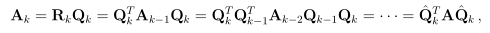 

kde $\hat{\mathbf{Q}}_k=\mathbf{Q}_1\mathbf{Q}_2\ldots\mathbf{Q}_k$ je ortonormálna matica. Tzn. matice $\mathbf{A}$, $\mathbf{A}_k$ sú podobné (čo platí pre ich vlastné hodnoty?). Potom platí nasledujúca veta. 

---

### <font color=green> Veta 8 (O QR algoritme) </font> 

Ak $|\lambda_1|>|\lambda_2|>\ldots>|\lambda_n|$, potom matice $\mathbf{A}_k$ z QR algoritmu konvergujú k hornej trojuholníkovej matici $\mathbf{T}=\mathbf{Q}'\mathbf{A}\mathbf{Q}$, kde $\mathbf{Q}=\lim\limits_{k\to\infty}\hat{\mathbf{Q}}_k$. 

---

Ak teda poznáme vlastné čísla matice $\mathbf{A}$, môžeme k nim dorátať aproximácie odpovedajúcich vlastných vektorov napr. metódou inverznej iterácie s posunom, kde ako posuny berieme vypočítané aproximácie vlastných čísel. 

Pokiaľ je matica $\mathbf{A}$ naviac symetrická, tak potom $\mathbf{T}=\mathrm{diag}(\lambda_1,\lambda_2,\ldots,\lambda_n)$ a $\mathbf{Q}=(\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_n)$ je matica odpovedajúcich vlastných vektorov. 

Preformulovanie ortogonálnej iterácie na QR metódu dáva elegantný algoritmus, ktorý však stále nerieši jeho vyššie uvedené nedostatky: vysoké výpočtové náklady v jednej iterácii a pomalú konvergenciu. QR metóda zapísaná vo forme predchádzajúceho algoritmu môže byť dokonca totálne nepoužiteľná: pre ortonormálnu maticu $\mathbf{A}$ (ktorej vlastné čísla ležia na jednotkovej kružnici v komplexnej rovnice) dostávame $\mathbf{A}_k=\mathbf{A}$.

#### Zrýchlenie konvergencie  

Zrýchlenie konvergencie je možné dosiahnuť podobne ako v modifikáciach mocninovej metódy vďaka vhodne zvoleným posunom. 

---

<b> <ins> Algoritmus </ins> </b> (QR metóda s posunmi)

**Krok 1** 

Vstup: matica $\mathbf{A}$; 

**Krok 2**

$\mathbf{A}_0:=\mathbf{A}$

**Krok 3** 

Postupne pre $k=1,2,\ldots$ opakuj: 

* vyber posun $\mu_k$


* vykonaj QR rozklad $\mathbf{Q}_k\mathbf{R}_k=\mathbf{A}_{k-1}-\mu\mathbf{I}$;


* $\mathbf{A}_k:=\mathbf{R}_k\mathbf{Q}_k+\mu_k\mathbf{I}$; 

**Krok 4** 

Výstup: $\mathbf{A}_k$. 

---

Keďže 

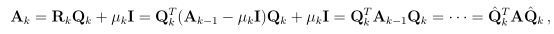 

tak matice $\mathbf{A}_k$ sú opäť podobné s maticou $\mathbf{A}$. Pre vhodne zvolené posuny sa dá konvergencia značne urýchliť. 
Najjednoduchšia voľba pre posun $\mu_k$ je prvok $a_{nn}^{(k-1)}$ v pravom dolnom rohu matice $\mathbf{A}_{k-1}$, známy ako **_Rayleighov posun_**. QR iterácie s Rayleighovym posunom konvergujú kubicky pre skoro všetky symetrické tridiagonálne matice. 

Robustnejšiu alternatívu predstavuje **_Wilkinsonov posun_**. Nech 

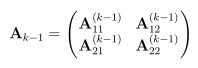 

je bloková matica s blokmi $\mathbf{A}_{11}^{(k-1)}$ rádu $n-2$ a $\mathbf{A}_{22}^{(k-1)}$ rádu $2$. Potom Wilkinsonov posun $\mu_k$ je rovný tomu vlastnému číslu $\mu$ submatice $\mathbf{A}_{22}^{(k-1)}$, ktoré je bližšie k $a_{nn}^{(k-1)}$. Pokiaľ matica $\mathbf{A}$ je symetrická, tak je i matica $\mathbf{A}_{22}^{(k-1)}$ symetrická a jej vlastné hodnoty sú reálne. Pre symetrickú tridiagonálnu maticu QR metóda s Wilkinsonovymi posunmi vždy konverguje, pri najmenšom lineárne, vo všeobecnosti pre skoro všetky matice však konverguje kubicky. 

Situácia sa mení, keď sú vlastné čísla komplexné. Potom je Wilkinsonov posun komplexné číslo a následné výpočty musia prebiehať v komplexnej aritmetike. V prípade reálnej matice $\mathbf{A}$ sa počítaniu s komplexnými číslami môžeme vyhnúť. Predpokladajme, že vlastné čísla matice $\mathbf{A}_{22}^{(k-1)}$ sú komplexne združené čísla $\mu$, $\bar{\mu}$. Dá sa ukázať, že dve po sebe nasledujúce iterácie - jedna s posunom $\mu$ a druhá s posunom $\bar{\mu}$ dávajú reálny výsledok. Chytrá implementácia založená na tejto skutočnosti je známa ako **_Francisov posun_**. 

--- 

#### Poznámka 9  

* Žiaľ, existujú matice, pre ktoré ani Francisov posun nevedie ku konvergencii. Praktické algoritmy preto používajú ešte ďalšie doplnkové posuny, pomocou ktorých sa pokúšajú stagnujúcu konvergenciu znova naštartovať. Keď sa to podarí, prejde sa opäť na Francisov posun. 


* Profesionálne programy založené na QR metóde používajú rôzne ďalšie opatrenia k zvýšeniu ako spoľahivosti tak i rychlosti. Tým pádom je možné prepracované implementácie QR metódy považovať za neiteračné procesy, lebo pre väčšinu matíc postačujú len dve až tri iterácie na to, aby sa vypočítalo jedno vlastné číslo s dostatočnou presnosťou. V takom prípade je celkový počet iterácií malý celočíselný násobok rádu $n$ matice. 

---

***
<a id=singularne></a>
 # <font color=brown> Výpočet singulárnych čísel a vektorov </font> 

Rozklad matice na singulárne hodnoty odhaľuje základnú štruktúru matice a vo veľkej miere sa používa v štatistických aplikáciách na nájdenie vzťahov medzi údajmi. 

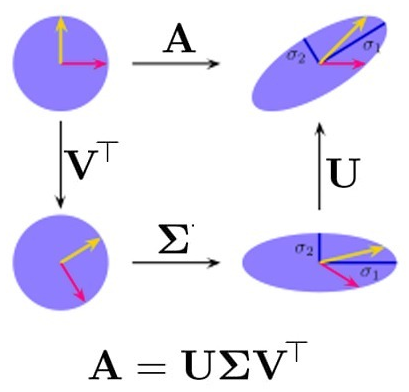 

Pripomeňme, že $\mathbf{A}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}'$ resp. v komplexnom obore $\mathbf{A}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^H$ je _**[singulárny rozklad matice](https://www.geogebra.org/m/mrey8VJX)**_ $\mathbf{A}$ rozmerov $m\times n$, kde $\mathbf{U}=(\mathbf{u}_1,\mathbf{u}_2,\ldots,\mathbf{u}_m)$ je ortonormálna (resp. unitárna) matica  rádu $m$, $\mathbf{V}=(\mathbf{v}_1),\mathbf{v}_2,\ldots,\mathbf{v}_n$ je ortonormálna (resp. unitárna) matica rádu $n$ a $\mathbf{\Sigma}=\mathrm{diag}(\sigma_1,\sigma_2,\ldots,\sigma_p)$ je diagonálna matica typu $m\times n$, pričom $p=\min\{m,n\}$ a $\sigma_1\ge\sigma_2\ge\ldots\ge\sigma_p\ge0$. Ďalej $\sigma_i$ sú singulárne čísla a $\mathbf{u}_i$ resp. $\mathbf{v}_i$ je $i$-tý ľavý resp. pravý singulárny vektor. Zrejme 

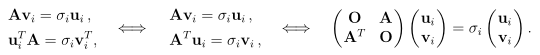

Singulárne čísla i singulárne vektory matice $\mathbf{A}$ sa dajú určiť pomocou vlastných čísel i vlastných vektorov symetrickej matice 

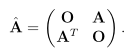




Ďalej BUNV predpokladajme, že $m\ge n$ (nie je to obmedzenie, lebo v prípade, že $n>m$, môžeme singulárny rozklad matice $\mathbf{A}$ zostaviť pomocou singulárneho rozkladu $\mathbf{A}'=\mathbf{V}\mathbf{\Sigma}'\mathbf{U}'$ matice $\mathbf{A}'$). Nech $\mathbf{U}_1$ je matica rozmerov $m\times n$ zostavená z prvých $n$ stĺpcov matice $\mathbf{U}$ a $\mathbf{U}_2$ je matica typu $m\times (m-n)$ zostavená z posledných $m-n$ stĺpcov matice $\mathbf{U}$, t.j. $\mathbf{U}=(\mathbf{U}_1,\mathbf{U}_2)$. Ak definujeme ortonormálnu maticu $\mathbf{Q}$ predpisom 

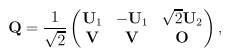 

potom ľahko overíme, že 

$$\mathbf{Q}'\hat{\mathbf{A}}\mathbf{Q}=\mathrm{diag}(\sigma_1,\ldots,\sigma_n,-\sigma_1,\ldots,-\sigma_n,0,\ldots,0)\equiv\mathbf{D} \quad \text{ resp. }\quad\hat{\mathbf{A}}\mathbf{Q}=\mathbf{Q}\mathbf{D}.$$ 

Pokiaľ $\hat{\mathbf{Q}}$ je ortonormálna matica vlastných vektorov matice $\hat{\mathbf{A}}$ a $\hat{\mathbf{D}}$ je odpovedajúca diagonálna matica vlastných čísel, t.j. $\hat{\mathbf{A}}\hat{\mathbf{Q}}=\hat{\mathbf{Q}}\hat{\mathbf{D}}$, potom zo štruktúry matíc $\mathbf{Q}$, $\mathbf{D}$ vyplýva existencia permutačnej matice $\mathbf{P}$ takej, že $\hat{\mathbf{Q}}\mathbf{P}=\mathbf{Q}$ a $\mathbf{P}'\hat{\mathbf{D}}\mathbf{P}=\mathbf{D}$. Z matíc $\mathbf{D}$, $\mathbf{Q}$ následne získame $\mathbf{\Sigma}=\mathrm{diag}(\sigma_1,\ldots,\sigma_n)$, $\mathbf{U}=(\mathbf{U}_1,\mathbf{U}_2)$ a $\mathbf{V}$. 

Ako uvidíme, singulárne čísla a singulárne vektory matice $\mathbf{A}$ úzko súvisia tiež s vlastnými číslami a s vlastnými vektormi symetrických matíc $\mathbf{A}'\mathbf{A}$, $\mathbf{A}\mathbf{A}'$. Platí totiž 

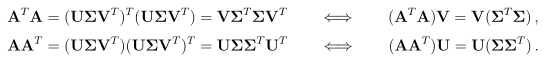 

Keďže $\mathbf{\Sigma}'\mathbf{\Sigma}=\mathrm{diag}\left(\sigma_1^2,\sigma_2^2,\ldots,\sigma_n^2\right)$, $\mathbf{\Sigma}\mathbf{\Sigma}'=\mathrm{diag}\left(\sigma_1^2,\sigma_2^2,\ldots,\sigma_n^2,0,\ldots,0\right)$, tak vidíme, že práve singulárne vektory $\mathbf{v}_i$ resp. ľave singulárne vektory $\mathbf{u}_i$ sú vlastné vektory matice $\mathbf{A}'\mathbf{A}$ resp. $\mathbf{A}\mathbf{A}'$, a že odpovedajúce singulárne čísla $\sigma_i$, $i=,1,2,\ldots,n$ sú nezáporné druhé odmocniny vlastných čísel matice $\mathbf{A}'\mathbf{A}$ i $\mathbf{A}\mathbf{A}'$. K výpočtu singulárnych čísel a vektorov je teda možné použiť metódy pre výpočet vlastných čísel symetrických matíc $\mathbf{A}'\mathbf{A}$, $\mathbf{A}\mathbf{A}'$. Jednoduchý postup môže vyzerať napr. takto: 

1. vypočítaj $\mathbf{C}=\mathbf{A}'\mathbf{A}$; 


2. pomocou QR metódy vypočítaj $\mathbf{V}_1'\mathbf{C}\mathbf{V}_1=\mathrm{diag}\left(\sigma_1^2,\sigma_2^2,\ldots,\sigma_n^2\right)$; 


3. vykonaj QR rozklad matice $\mathbf{A}\mathbf{V}_1$ so stĺpcovým pivotovaním: $\mathbf{U}'(\mathbf{A}\mathbf{V}_1)\mathbf{P}=\mathbf{R}$, kde $\mathbf{R}=\left\{r_{ij}\right\}_{i,j=1}^n$ je horná trojuholníková matica a $\mathbf{P}$ je permutačná matica zvolená tak, aby $r_{11}\ge r_{22}\ge \ldots \ge r_{nn}$. 

Jednoducho sa dá presvedčiť, že matica $\mathbf{R}'\mathbf{R}$ je diagonálna, čo znamená, že stĺpce matice $\mathbf{R}$ sú navzájom ortogonálne, a keďže $\mathbf{R}$ je horná trojuholníková matica, tak musí byť diagonálna. Preto $\mathbf{R}=\mathbf{\Sigma}$ a $\mathbf{A}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}'$, kde $\mathbf{V}=\mathbf{V}_1\mathbf{P}$, je hľadaný singulárny rozklad. Pri výpočte $\mathbf{A}'\mathbf{A}$ však dochádza k strate informácie. Z tohto dôvodu sa používajú lepšie metódy, ktoré sa priamemu formovaniu súčinu $\mathbf{A}'\mathbf{A}$ vyhýbajú. 

Stručne by sa dal **štandardný postup výpočtu singulárneho rozkladu** popísať takto: 

1) Pomocou finitného [Golubovho-Kahanovho bidiagonalizačného algoritmu](https://netlib.org/utk/people/JackDongarra/etemplates/node198.html) získame rozklad $\mathbf{A}=\mathbf{U}_1\mathbf{B}\mathbf{V}_1'$, kde $\mathbf{B}$ je bidiagonálna matica, ktorej nenulové prvky sa môžu nachádzať iba na hlavnej diagonále a v prvej naddiagonále, ďalej $\mathbf{U}_1$, $\mathbf{V}_1$ sú ortonormálne matice. 


2) Využije sa, že vlastné čísla tridiagonálnej matice $\mathbf{T}_r=\mathbf{B}'\mathbf{B}$ sú kvadráty singularných čísel matice $\mathbf{B}$, a že vlastné vektory matice $\mathbf{T}_r$ sú pravé singulárne vektory matice $\mathbf{B}$. Ďalej nech $\mathbf{T}_r=\mathbf{V}_2\mathbf{D}_r\mathbf{V}_2'$ je spektrálny rozklad matice $\mathbf{T}_r$. Použitím $\mathbf{T}_l=\mathbf{B}\mathbf{B}'$, potom zo spektrálneho rozkladu $\mathbf{T}_l=\mathbf{U}_2'\mathbf{D}_l\mathbf{U}_2$ dostaneme ľavé singulárne vektory $\mathbf{B}$. Výpočet vlastných čísel a vektorov matíc $\mathbf{T}_r$ resp. $\mathbf{T}_l$ sa dá efektívne realizovať pomocou modifikácie QR metódy znamej ako *dqds algoritmus*.  


3) Nakoniec dostaneme singulárny rozklad $\mathbf{A}=\mathbf{U}_1\mathbf{U}_2\mathbf{\Sigma}(\mathbf{V}_1\mathbf{V}_2)'$, matica $\mathbf{\Sigma}$ sa vytvorí z odmocnín diagonálnych prvkov matice $\mathbf{D}_r$ alebo $\mathbf{D}_l$. 

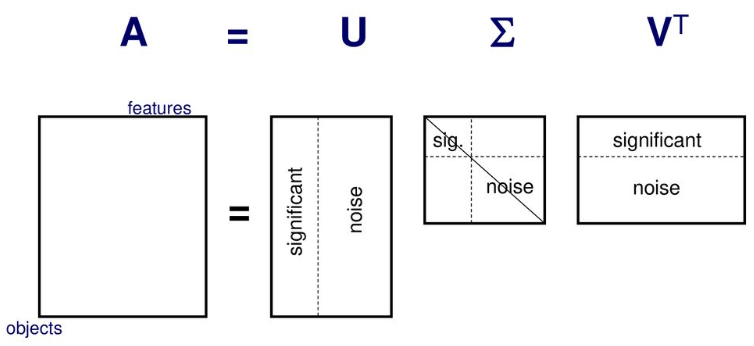 

---

#### <font color=blue> Príklad 7 </font> 

In [24]:
from scipy import linalg 

A = np.array([[1,2,3],[4,5,6]]) 
print('A = ')
print(A) 
print('')
U, s, Vh = linalg.svd(A) 
M,N = A.shape
Sigma = linalg.diagsvd(s,M,N)
print('U = ') 
print(U)
print('') 
print('Sigma = ') 
print(Sigma) 
print('')
print('Vh = ') 
print(Vh) 
print('')

# kontrola 
print('U * Sigma * Vh = ') 
print(U @ Sigma @ Vh) 

# overenie ortogonality matic U, V 
print('(U^T) * U = ')
print(U.T @ U) 
print('') 
print('(V^T) * V = ')
print(Vh @ Vh.T)

A = 
[[1 2 3]
 [4 5 6]]

U = 
[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]

Sigma = 
[[9.508032   0.         0.        ]
 [0.         0.77286964 0.        ]]

Vh = 
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]

U * Sigma * Vh = 
[[1. 2. 3.]
 [4. 5. 6.]]
(U^T) * U = 
[[ 1.00000000e+00 -3.31220243e-17]
 [-3.31220243e-17  1.00000000e+00]]

(V^T) * V = 
[[1.00000000e+00 7.75811935e-17 3.06256978e-17]
 [7.75811935e-17 1.00000000e+00 2.44753778e-16]
 [3.06256978e-17 2.44753778e-16 1.00000000e+00]]


--- 

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 